In [1]:
import os 
import datetime
from datetime import timedelta 

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']=False
%config InlineBackend.figure_format = 'retina'

# Exploratory Data Analysis (EDA)
- Loading the dataset
- Data wrangling for missing variables.
- Data transformation.
- Data visualization

## Loading Dataset

In [2]:
df = pd.read_excel('Data_B2_Aug22.xlsx',sheet_name='Data GT21',index_col='Time',parse_dates=True)
df.head(5)

GT21_GEN_WATT  GT21_GEN_VAR  GT21_GEN_CURRENT  \
Time                                                                 
2022-08-01 16:22:00      78.919998     22.399994            3.3520   
2022-08-01 16:23:00      78.879997     22.679993            3.3552   
2022-08-01 16:24:00      78.900002     22.160004            3.3464   
2022-08-01 16:25:00      78.879997     22.600006            3.3544   
2022-08-01 16:26:00      78.879997     24.800003            3.3688   

                     GT21_GEN_VOLTAGE  GT21_PWR_FACTOR  GT21_FUEL_GAS_PRESS  \
Time                                                                          
2022-08-01 16:22:00         14.012585           0.9593            22.920004   
2022-08-01 16:23:00         14.014321           0.9533            22.923368   
2022-08-01 16:24:00         13.999873           0.9594            22.924826   
2022-08-01 16:25:00         14.010889           0.9580            22.932508   
2022-08-01 16:26:00         14.068130           0.9499            22.937534   

                      GT21_CSO   GT21_SPEED  GT21_IGV_CSO  GT21_IGV_FB  ...  \
Time                                                                    ...   
2022-08-01 16:22:00  49.967331  3000.749756      4.634204     3.736488  ...   
2022-08-01 16:23:00  49.952187  3000.375000      4.713875     4.588711  ...   
2022-08-01 16:24:00  49.945923  3002.250000      4.242820     4.498821  ...   
2022-08-01 16:25:00  49.931870  2999.625000      4.282087     4.476509  ...   
2022-08-01 16:26:00  49.959335  3003.000000      3.483915     3.177788  ...   

                     GT21_FG_DIFF_PRESS  GT21_INLET_AIR_DIFF_KKU  \
Time                                                               
2022-08-01 16:22:00         2483.298340                17.713844   
2022-08-01 16:23:00         2492.740723                17.543585   
2022-08-01 16:24:00         2478.266846                17.671490   
2022-08-01 16:25:00         2483.736572                17.372540   
2022-08-01 16:26:00         2477.311279                17.840557   

                     GT21_NOX_7O2  HG21_IN_GAS_PRESS  HG21_OUT_GAS_PRESS  \
Time                                                                       
2022-08-01 16:22:00    242.216736         150.305923            9.476915   
2022-08-01 16:23:00    240.667953         140.530289            8.401543   
2022-08-01 16:24:00    239.454880         144.526031            8.797348   
2022-08-01 16:25:00    240.330811         134.332230            9.473122   
2022-08-01 16:26:00    239.392868         134.271942            7.922137   

                     HG21_IN_GAS_TEMP  HG21_OUT_GAS_TEMP  ST20_GEN_OUTPUT  \
Time                                                                        
2022-08-01 16:22:00        543.701965         112.311058           94.250   
2022-08-01 16:23:00        543.361084         112.362770           94.375   
2022-08-01 16:24:00        542.909546         112.406670           94.375   
2022-08-01 16:25:00        542.849854         112.471581           94.250   
2022-08-01 16:26:00        543.249390         112.465416           94.500   

                      AMB_TEMP  RELATIVE_HUMIDITY  
Time                                               
2022-08-01 16:22:00  30.101013          74.509972  
2022-08-01 16:23:00  30.043385          74.859016  
2022-08-01 16:24:00  30.046749          74.979477  
2022-08-01 16:25:00  30.044460          74.969315  
2022-08-01 16:26:00  30.045685          73.928795  

[5 rows x 46 columns]

## Checking Missing Value  & Data Distributions

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39115 entries, 2022-08-01 16:22:00 to 2022-08-31 23:59:00
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GT21_GEN_WATT            39115 non-null  float64
 1   GT21_GEN_VAR             39115 non-null  float64
 2   GT21_GEN_CURRENT         39115 non-null  float64
 3   GT21_GEN_VOLTAGE         39115 non-null  float64
 4   GT21_PWR_FACTOR          39115 non-null  float64
 5   GT21_FUEL_GAS_PRESS      39115 non-null  float64
 6   GT21_CSO                 39115 non-null  float64
 7   GT21_SPEED               39115 non-null  float64
 8   GT21_IGV_CSO             39115 non-null  float64
 9   GT21_IGV_FB              39115 non-null  float64
 10  GT21_EXH_DAMPER_CMD      39115 non-null  int64  
 11  GT21_EXH_DAMPER_FB       39115 non-null  float64
 12  GT21_COMP_IN_AIR_TEMP    39115 non-null  float64
 13  GT21_RCA_TEMP_R          39115 non-null  

In [4]:
pd.set_option('display.max_columns', None) #to preview all columns
df.describe()

GT21_GEN_WATT  GT21_GEN_VAR  GT21_GEN_CURRENT  GT21_GEN_VOLTAGE  \
count   39115.000000  39115.000000      39115.000000      39115.000000   
mean       79.210594     15.372026          3.312241         13.881127   
std         5.320382      7.994889          0.231003          0.129419   
min        54.520000    -10.360001          2.235200         13.427789   
25%        78.459999      9.759995          3.256000         13.793956   
50%        78.839996     15.720001          3.292800         13.885638   
75%        79.680000     20.800003          3.339200         13.967453   
max       111.959999     51.240005          4.655200         14.397399   

       GT21_PWR_FACTOR  GT21_FUEL_GAS_PRESS      GT21_CSO    GT21_SPEED  \
count     39115.000000         39115.000000  39115.000000  39115.000000   
mean          0.918640            22.997393     49.960487   2999.860696   
std           0.325113             0.335881      0.960499      1.917183   
min          -0.999901            22.090004     44.466270   2993.250000   
25%           0.960500            22.843879     49.848736   2998.500000   
50%           0.978500            22.926809     49.987091   3000.000000   
75%           0.987800            23.006807     50.106785   3001.500000   
max           1.000000            25.384996     54.708935   3008.250000   

       GT21_IGV_CSO   GT21_IGV_FB  GT21_EXH_DAMPER_CMD  GT21_EXH_DAMPER_FB  \
count  39115.000000  39115.000000              39115.0        39115.000000   
mean       5.133993      4.930324                100.0          102.671996   
std        8.952772      9.046139                  0.0            0.290884   
min        0.000000     -3.009346                100.0          102.000000   
25%        1.926169      1.746959                100.0          102.374992   
50%        3.366533      3.279814                100.0          102.750000   
75%        5.092925      5.024940                100.0          102.937500   
max      100.000000    100.768150                100.0          103.312500   

       GT21_COMP_IN_AIR_TEMP  GT21_RCA_TEMP_R  GT21_RCA_TEMP_L  \
count           39115.000000     39115.000000     39115.000000   
mean               26.710784       188.096085       188.963702   
std                 2.509865         5.616161         5.887693   
min                22.068464       174.101059       174.980988   
25%                24.719721       184.659920       185.283920   
50%                26.194572       186.999634       187.865402   
75%                28.714316       190.430290       191.415169   
max                34.798161       231.209778       234.410202   

       GT21_DISC_TEMP2_R  GT21_DISC_TEMP2_L  GT21_DISC_TEMP3_R  \
count       39115.000000       39115.000000       39115.000000   
mean          359.011387         411.262619         327.516826   
std             5.206347           6.372677           5.935729   
min           334.901093         364.083801         295.591003   
25%           356.221313         410.358063         325.340515   
50%           358.439514         411.772369         327.395752   
75%           361.899673         413.876007         330.570526   
max           400.051758         431.532684         365.149048   

       GT21_DISC_TEMP3_L  GT21_DISC_TEMP4_R  GT21_DISC_TEMP4_L  GT21_BPT_AVG  \
count       39115.000000       39115.000000       39115.000000  39115.000000   
mean          330.023058         382.125713         386.555196    554.454848   
std             5.671607          10.833231          11.954660     12.675547   
min           300.849548         319.494324         328.510162    460.606445   
25%           327.441528         378.962692         378.474442    555.911407   
50%           329.369110         384.350037         387.153656    556.916992   
75%           333.185364         388.931122         395.380051    557.752441   
max           366.374329         407.558777         424.916168    586.889893   

       GT21_EXH_GAS_TEMP_AVG  GT21_FUEL_GAS_FLOW  

## Data Transformation 

In [5]:
#Average RCA and Discavity Temp
df['GT21_RCA_TEMP_AVG'] = (df['GT21_RCA_TEMP_R'] + df['GT21_RCA_TEMP_L']) / 2
df['GT21_DISC_TEMP2_AVG'] = (df['GT21_DISC_TEMP2_R'] + df['GT21_DISC_TEMP2_L']) / 2
df['GT21_DISC_TEMP3_AVG'] = (df['GT21_DISC_TEMP3_R'] + df['GT21_DISC_TEMP3_L']) / 2
df['GT21_DISC_TEMP4_AVG'] = (df['GT21_DISC_TEMP4_R'] + df['GT21_DISC_TEMP4_L']) / 2

### Drop the Unusual periods

In [6]:
#Drop the Unusual periods

#Water Injection Period
df = df.drop(df[df.GT21_WTR_INJ_FLOW > 0.5].index)
df = df.drop(df[df.GT21_STEAM_INJ_FLOW < 2.5].index)

#NOx Outlier Period
df = df.drop(df[df.GT21_NOX_7O2 < 200].index)
df = df.drop(df[df.GT21_NOX_7O2 > 300].index)

In [7]:
df.head()

GT21_GEN_WATT  GT21_GEN_VAR  GT21_GEN_CURRENT  \
Time                                                                 
2022-08-01 16:22:00      78.919998     22.399994            3.3520   
2022-08-01 16:23:00      78.879997     22.679993            3.3552   
2022-08-01 16:24:00      78.900002     22.160004            3.3464   
2022-08-01 16:25:00      78.879997     22.600006            3.3544   
2022-08-01 16:26:00      78.879997     24.800003            3.3688   

                     GT21_GEN_VOLTAGE  GT21_PWR_FACTOR  GT21_FUEL_GAS_PRESS  \
Time                                                                          
2022-08-01 16:22:00         14.012585           0.9593            22.920004   
2022-08-01 16:23:00         14.014321           0.9533            22.923368   
2022-08-01 16:24:00         13.999873           0.9594            22.924826   
2022-08-01 16:25:00         14.010889           0.9580            22.932508   
2022-08-01 16:26:00         14.068130           0.9499            22.937534   

                      GT21_CSO   GT21_SPEED  GT21_IGV_CSO  GT21_IGV_FB  \
Time                                                                     
2022-08-01 16:22:00  49.967331  3000.749756      4.634204     3.736488   
2022-08-01 16:23:00  49.952187  3000.375000      4.713875     4.588711   
2022-08-01 16:24:00  49.945923  3002.250000      4.242820     4.498821   
2022-08-01 16:25:00  49.931870  2999.625000      4.282087     4.476509   
2022-08-01 16:26:00  49.959335  3003.000000      3.483915     3.177788   

                     GT21_EXH_DAMPER_CMD  GT21_EXH_DAMPER_FB  \
Time                                                           
2022-08-01 16:22:00                  100             102.125   
2022-08-01 16:23:00                  100             102.125   
2022-08-01 16:24:00                  100             102.125   
2022-08-01 16:25:00                  100             102.125   
2022-08-01 16:26:00                  100             102.125   

                     GT21_COMP_IN_AIR_TEMP  GT21_RCA_TEMP_R  GT21_RCA_TEMP_L  \
Time                                                                           
2022-08-01 16:22:00              27.928343       189.912125       190.917206   
2022-08-01 16:23:00              27.864775       189.909195       190.867813   
2022-08-01 16:24:00              27.785229       190.129669       190.975739   
2022-08-01 16:25:00              27.792795       190.028442       190.819519   
2022-08-01 16:26:00              27.854227       189.888000       190.739227   

                     GT21_DISC_TEMP2_R  GT21_DISC_TEMP2_L  GT21_DISC_TEMP3_R  \
Time                                                                           
2022-08-01 16:22:00         360.682312         411.124817         331.409485   
2022-08-01 16:23:00         360.668121         410.924957         331.363037   
2022-08-01 16:24:00         360.671234         410.867035         331.272827   
2022-08-01 16:25:00         360.306244         410.438049         331.156219   
2022-08-01 16:26:00         360.820038         411.042328         331.388733   

                     GT21_DISC_TEMP3_L  GT21_DISC_TEMP4_R  GT21_DISC_TEMP4_L  \
Time                                                                           
2022-08-01 16:22:00         333.147858         388.520630         370.760620   
2022-08-01 16:23:00         333.109192         388.491425         370.725922   
2022-08-01 16:24:00         332.992737         388.512512         370.561859   
2022-08-01 16:25:00         333.004456         388.731964         370.514587   
2022-08-01 16:26:00         333.150024         388.816345         371.037842   

                     GT21_BPT_AVG  GT21_EXH_GAS_TEMP_AVG  GT21_FUEL_GAS_FLOW  \
Time                                                                           
2022-08-01 16:22:00    557.622681             545.007263           28.045168   
2022-08-01 16:23:00    556.545105             545.004333           28.099985   
2022-

In [8]:
df.describe()

GT21_GEN_WATT  GT21_GEN_VAR  GT21_GEN_CURRENT  GT21_GEN_VOLTAGE  \
count   35537.000000  35537.000000      35537.000000      35537.000000   
mean       79.296532     15.325766          3.315401         13.880951   
std         5.536008      7.953851          0.239864          0.128756   
min        54.520000    -10.360001          2.235200         13.427789   
25%        78.540001      9.720001          3.258400         13.794619   
50%        78.919998     15.720001          3.295200         13.886040   
75%        79.739998     20.720001          3.341600         13.966646   
max       111.959999     51.240005          4.655200         14.397399   

       GT21_PWR_FACTOR  GT21_FUEL_GAS_PRESS      GT21_CSO    GT21_SPEED  \
count     35537.000000         35537.000000  35537.000000  35537.000000   
mean          0.921424            23.007181     49.950061   2999.859280   
std           0.317889             0.348590      0.999517      1.918113   
min          -0.999901            22.090004     44.466270   2993.250000   
25%           0.961000            22.844957     49.838299   2998.500000   
50%           0.978600            22.934958     49.971703   3000.000000   
75%           0.987900            23.014996     50.099880   3001.500000   
max           1.000000            25.384996     54.708935   3008.250000   

       GT21_IGV_CSO   GT21_IGV_FB  GT21_EXH_DAMPER_CMD  GT21_EXH_DAMPER_FB  \
count  35537.000000  35537.000000              35537.0        35537.000000   
mean       5.275469      5.073221                100.0          102.705662   
std        9.292996      9.383294                  0.0            0.281645   
min        0.000000     -3.009346                100.0          102.000000   
25%        1.872343      1.681723                100.0          102.437500   
50%        3.368765      3.281321                100.0          102.750000   
75%        5.157513      5.070671                100.0          102.937500   
max      100.000000    100.768150                100.0          103.312500   

       GT21_COMP_IN_AIR_TEMP  GT21_RCA_TEMP_R  GT21_RCA_TEMP_L  \
count           35537.000000     35537.000000     35537.000000   
mean               26.716049       188.158822       189.036455   
std                 2.559743         5.793657         6.076473   
min                22.068464       174.101059       174.980988   
25%                24.699150       184.580399       185.191086   
50%                26.179817       187.042908       187.914978   
75%                28.793625       190.507278       191.512863   
max                34.798161       231.209778       234.410202   

       GT21_DISC_TEMP2_R  GT21_DISC_TEMP2_L  GT21_DISC_TEMP3_R  \
count       35537.000000       35537.000000       35537.000000   
mean          359.105142         411.256230         327.507017   
std             5.362560           6.623722           6.136024   
min           334.901093         364.083801         295.591003   
25%           356.261963         410.313110         325.241241   
50%           358.590363         411.849457         327.416168   
75%           362.104248         414.027344         330.678223   
max           400.051758         431.532684         365.149048   

       GT21_DISC_TEMP3_L  GT21_DISC_TEMP4_R  GT21_DISC_TEMP4_L  GT21_BPT_AVG  \
count       35537.000000       35537.000000       35537.000000  35537.000000   
mean          330.059204         382.073892         387.457536    554.281543   
std             5.856685          11.235126          12.096533     13.155795   
min           300.849548         319.494324         328.510162    460.606445   
25%           327.427063         378.786224         379.546082    555.903809   
50%           329.433594         384.720856         389.703705    556.937927   
75%           333.379456         389.164948         396.152985    557.783447   
max           366.374329         407.558777         424.916168    586.889893   

       GT21_EXH_GAS_TEMP_AVG  GT21_FUEL_GAS_FLOW  

## Data visualization

### Data Distribution BEFORE Normalization

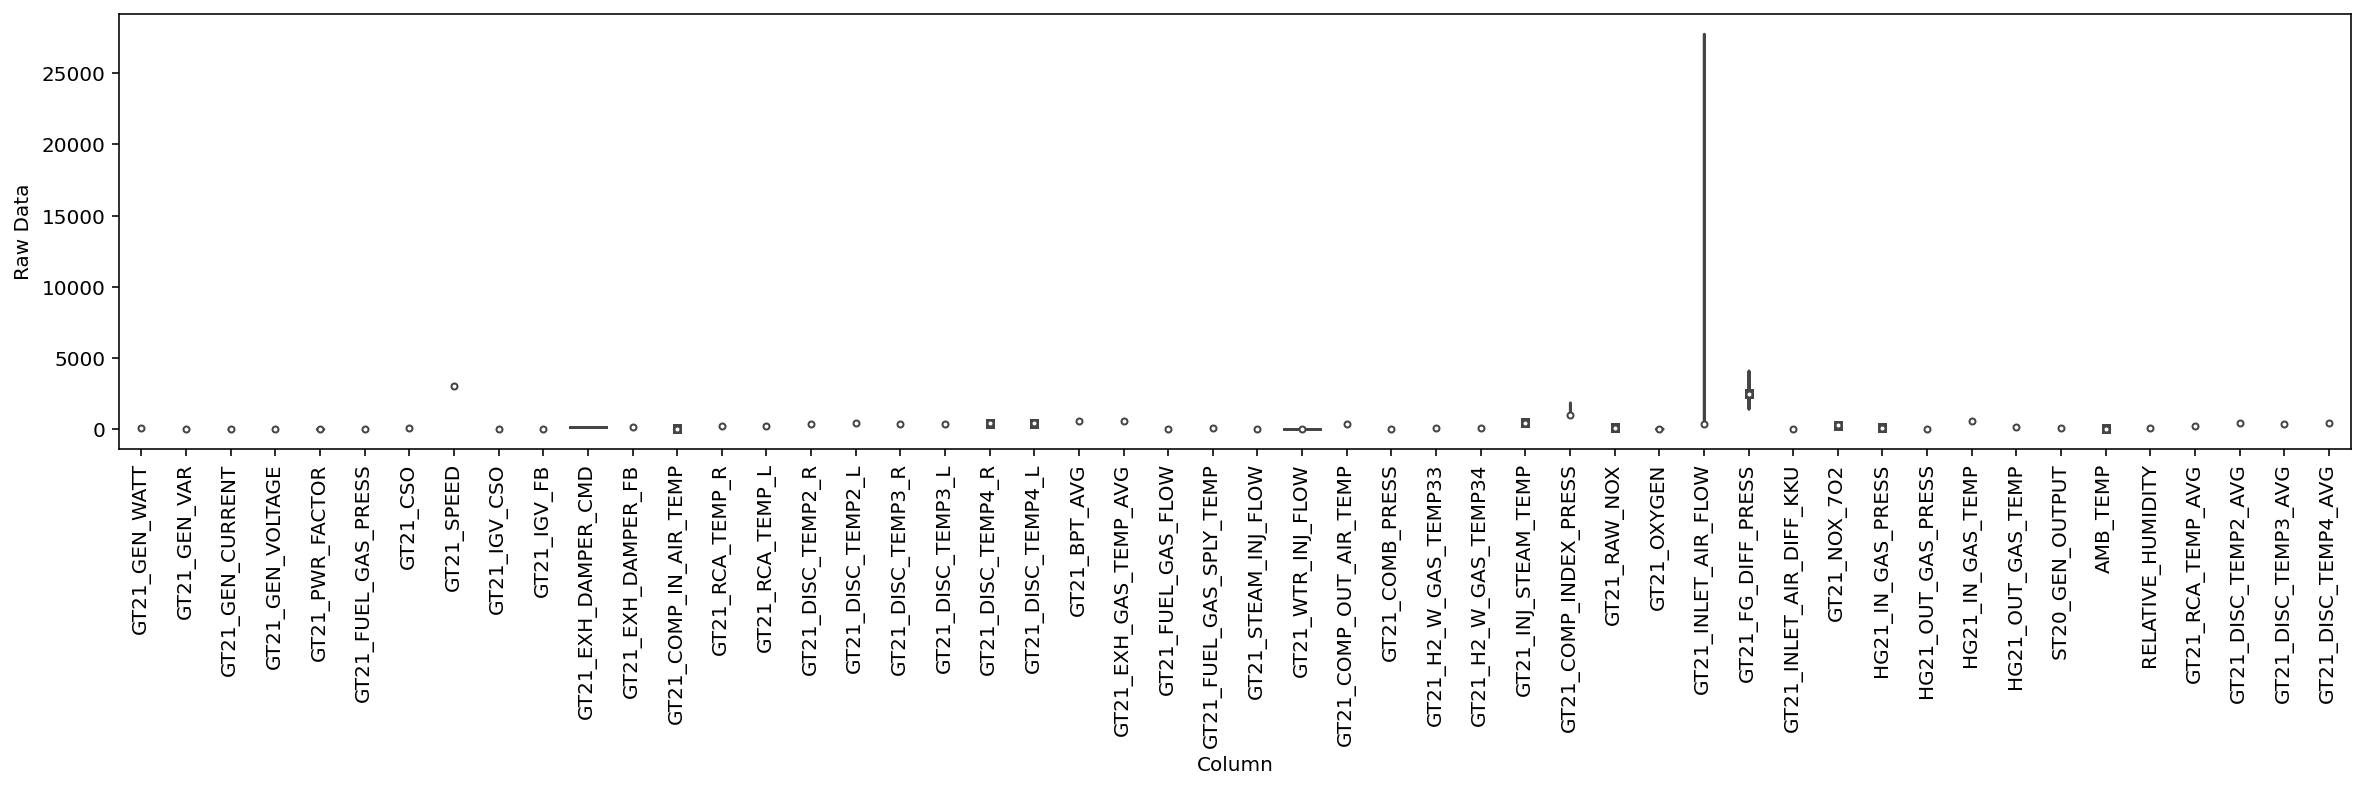

In [9]:
#before normalization 
df_melt = df.melt(var_name='Column', value_name='Raw Data')
#.melt to transform to Long Format (like before pivot table)
plt.figure(figsize=(20, 4))
ax = sns.violinplot(x='Column', y='Raw Data', data=df_melt)
ax.set_xticklabels(df.keys(), rotation=90);

### Gen. and NOx 

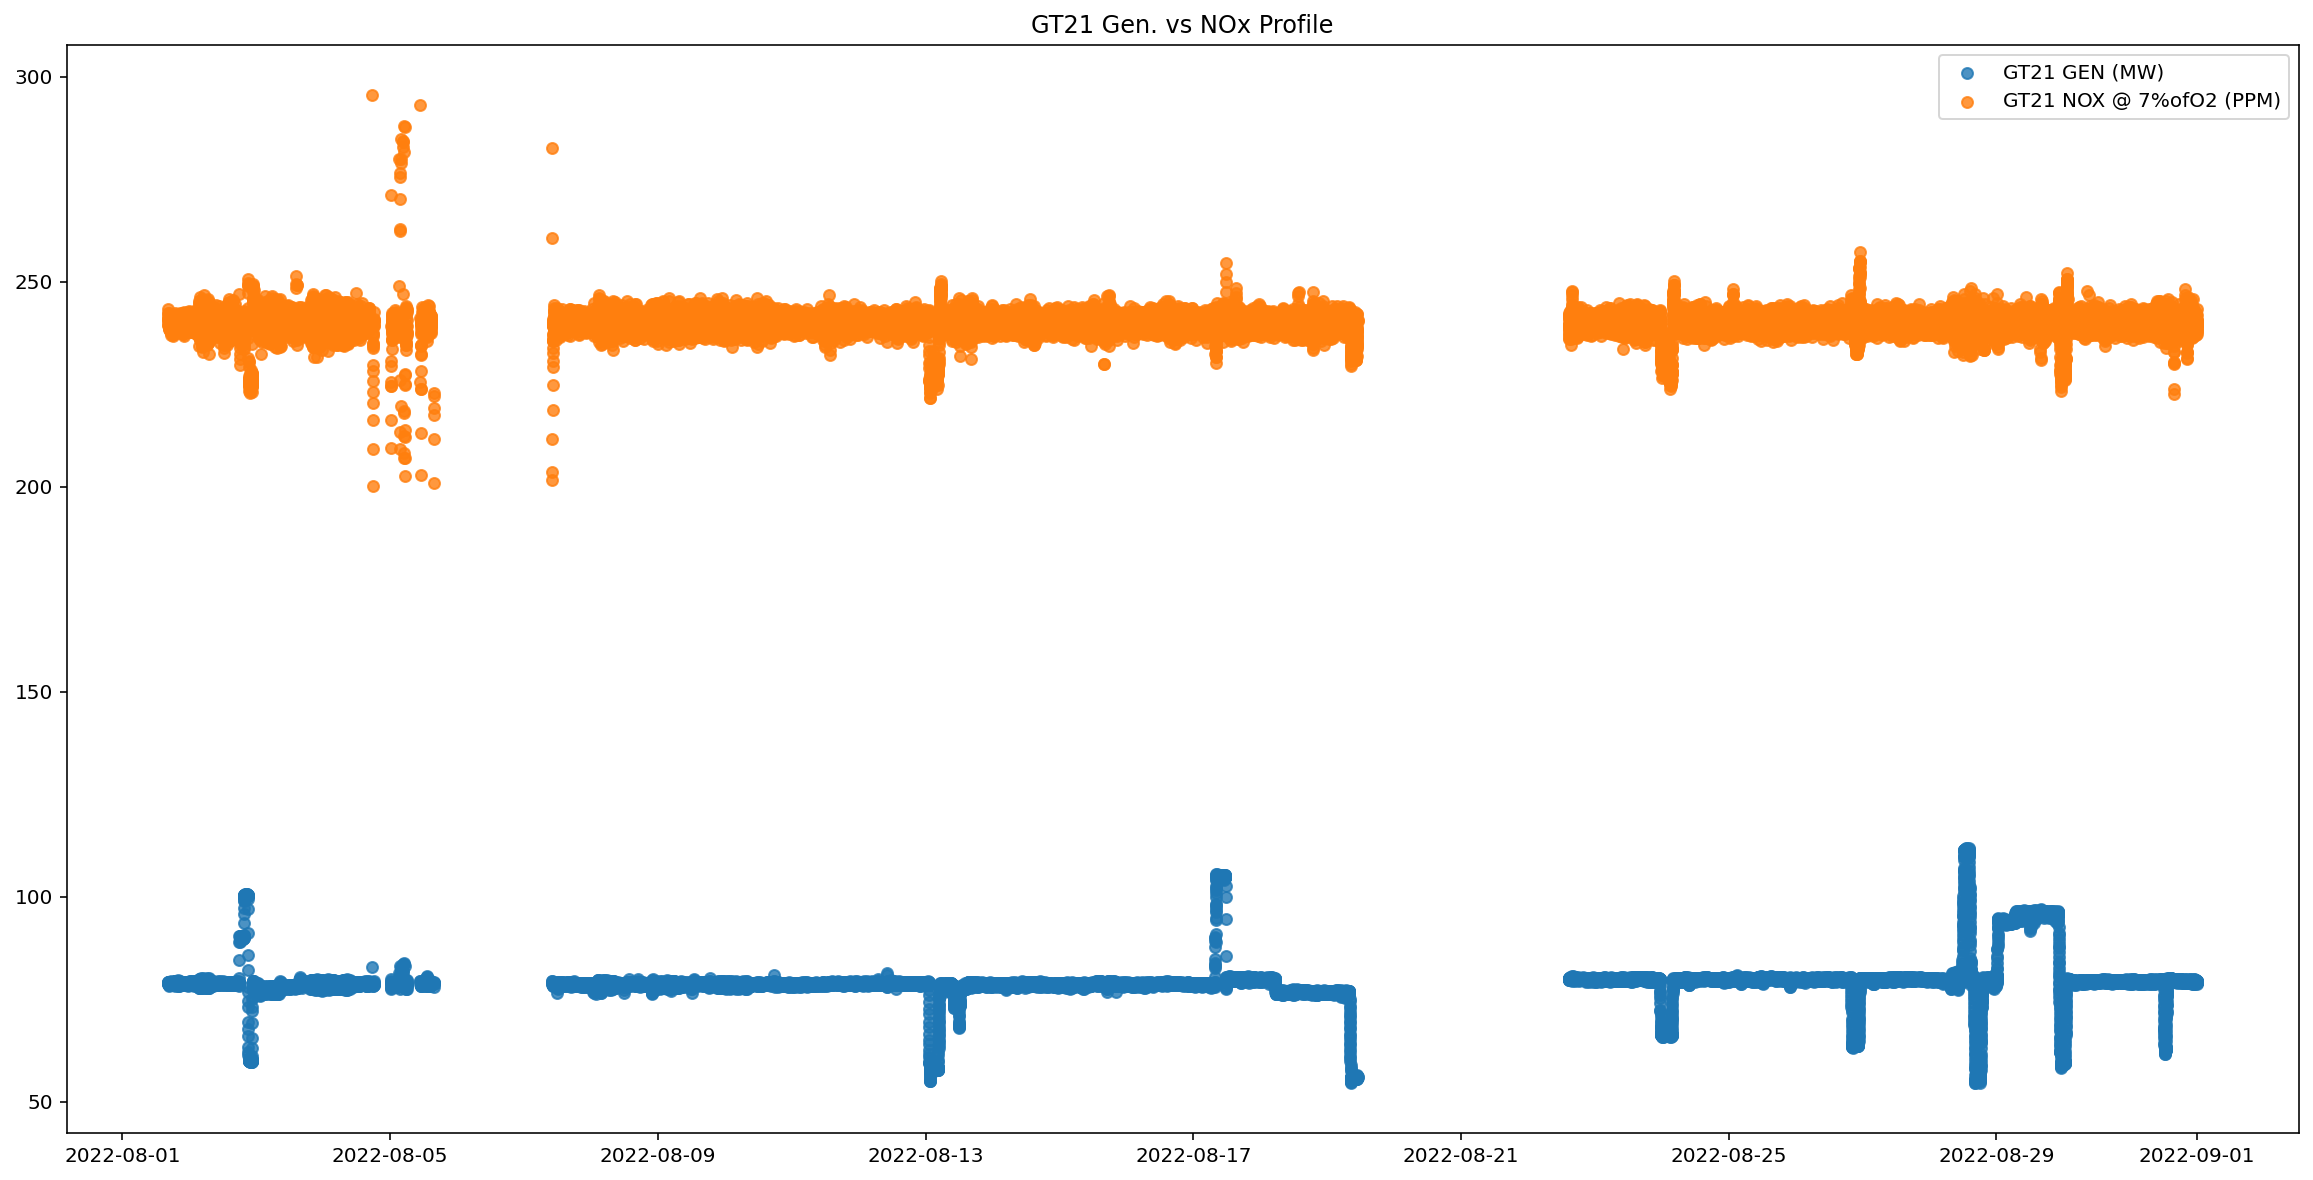

In [10]:
plt.figure(figsize=(20,10))
plt.title('GT21 Gen. vs NOx Profile')
plt.scatter(df.index,df['GT21_GEN_WATT'],s=30,alpha=0.8,label='GT21 GEN (MW)')
plt.scatter(df.index,df['GT21_NOX_7O2'],s=30,alpha=0.8,label='GT21 NOX @ 7%ofO2 (PPM)')
plt.legend()

#plt.figure(figsize=(10,5))
#fig, ax = plt.subplots(2,1,sharex=True)
#ax[0].plot(df['GT21_NOX_7O2'], label='GT21 NOX @ 7%ofO2 (PPM)')
#ax[1].plot(df['GT21_GEN_WATT'], label='GT21 GEN (MW)')

### Correlation BEFORE Feature Selection

<AxesSubplot:title={'center':'Correlation BEFORE Features Selection'}>

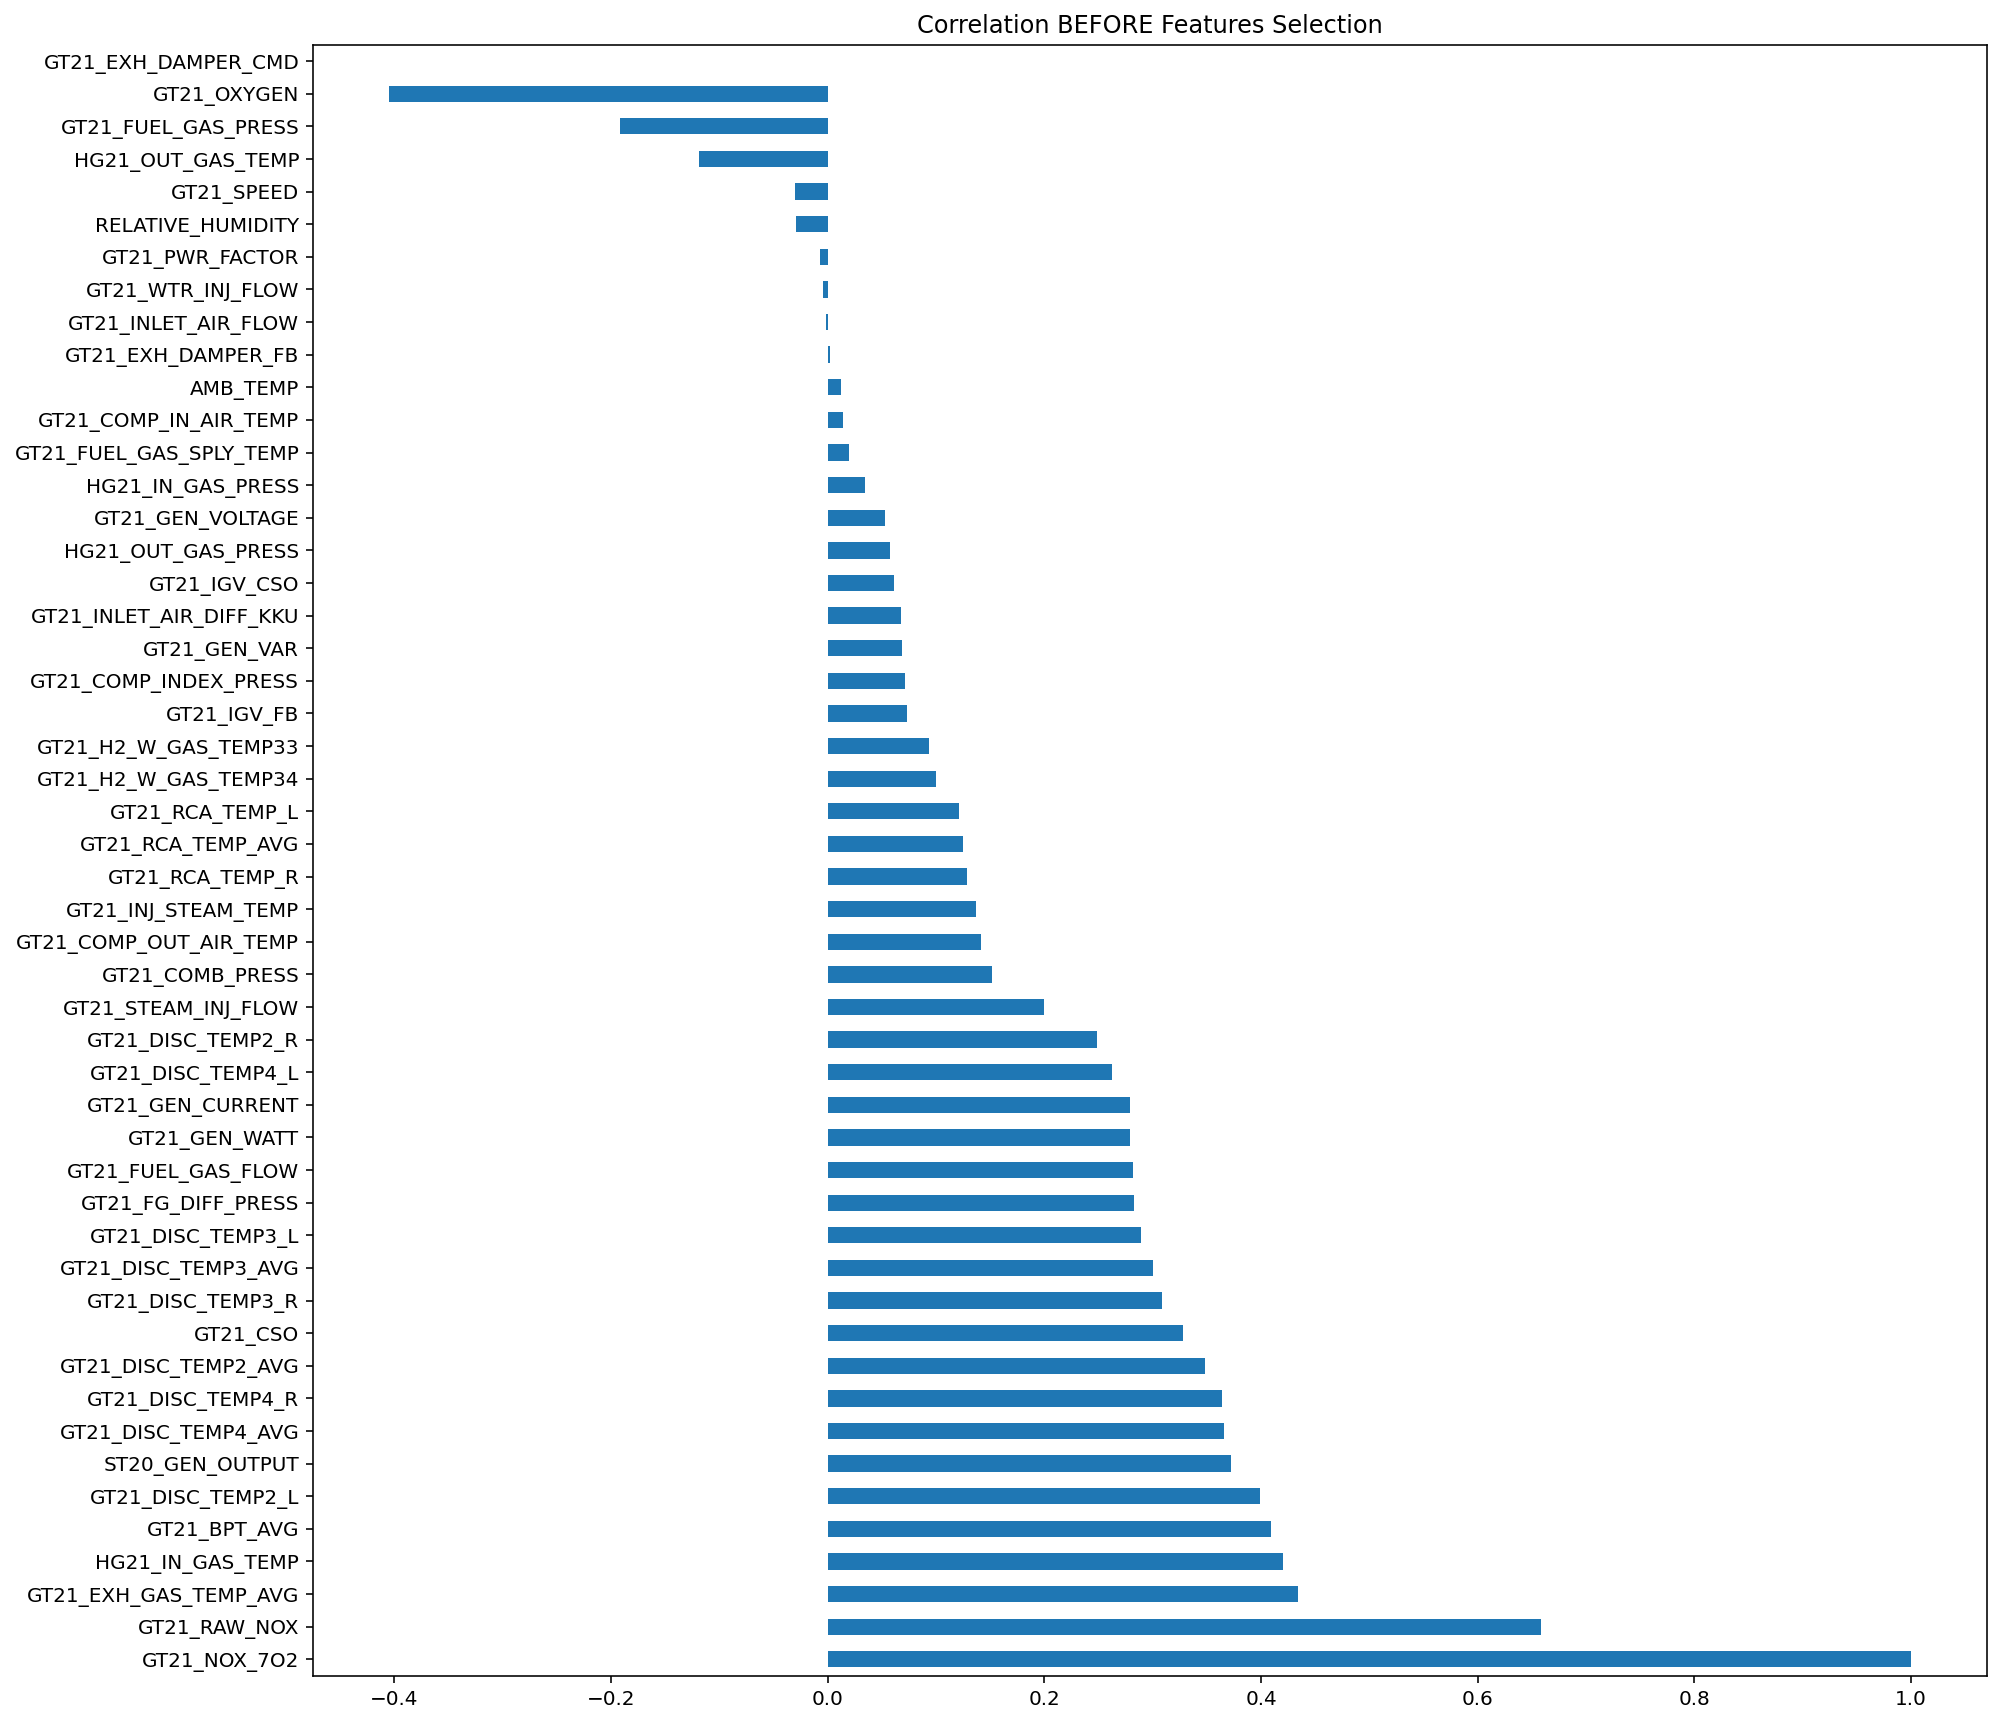

In [11]:
plt.title('Correlation BEFORE Features Selection')
df.corr()['GT21_NOX_7O2'].sort_values(ascending=False).plot(kind='barh',figsize=(15,15))

### Heatamp BEFORE Features Selections

<AxesSubplot:>

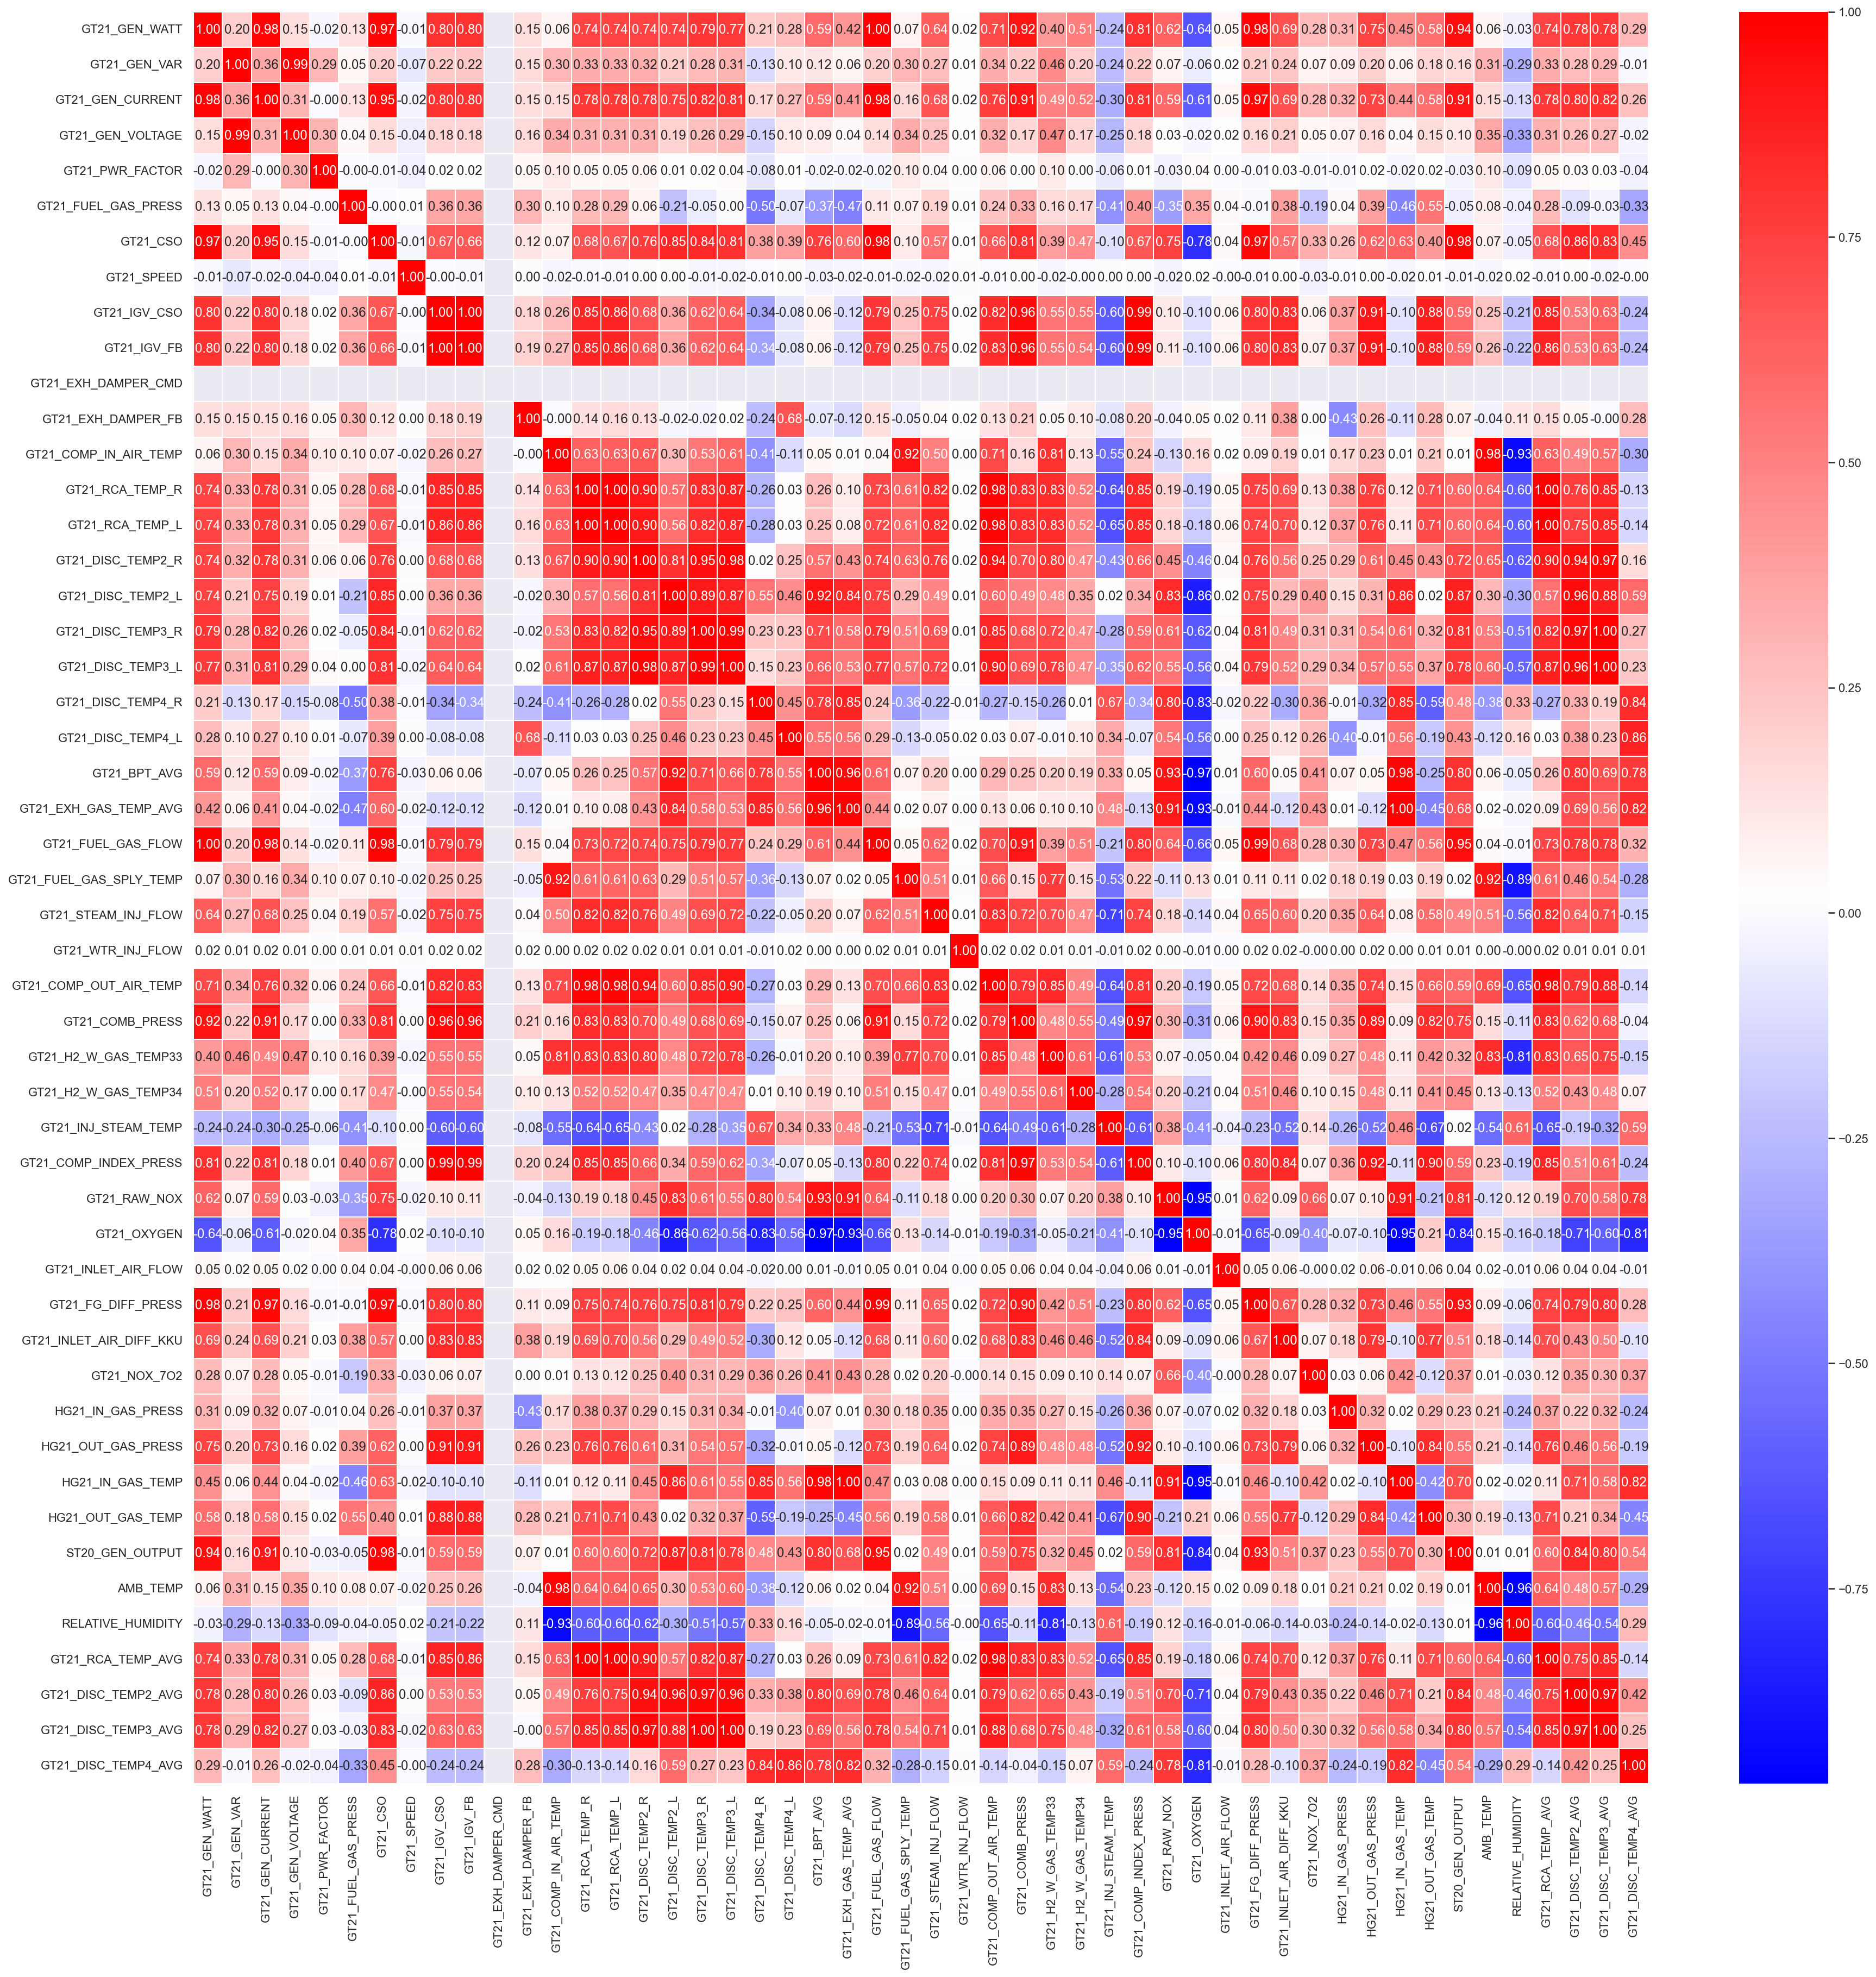

In [12]:
sns.set(rc={'figure.figsize': (30, 30)})
sns.heatmap(df.corr(), cmap ="bwr", annot=True, fmt='.2f', linewidths=0.05)

In [13]:
df.columns

Index(['GT21_GEN_WATT', 'GT21_GEN_VAR', 'GT21_GEN_CURRENT', 'GT21_GEN_VOLTAGE',
       'GT21_PWR_FACTOR', 'GT21_FUEL_GAS_PRESS', 'GT21_CSO', 'GT21_SPEED',
       'GT21_IGV_CSO', 'GT21_IGV_FB', 'GT21_EXH_DAMPER_CMD',
       'GT21_EXH_DAMPER_FB', 'GT21_COMP_IN_AIR_TEMP', 'GT21_RCA_TEMP_R',
       'GT21_RCA_TEMP_L', 'GT21_DISC_TEMP2_R', 'GT21_DISC_TEMP2_L',
       'GT21_DISC_TEMP3_R', 'GT21_DISC_TEMP3_L', 'GT21_DISC_TEMP4_R',
       'GT21_DISC_TEMP4_L', 'GT21_BPT_AVG', 'GT21_EXH_GAS_TEMP_AVG',
       'GT21_FUEL_GAS_FLOW', 'GT21_FUEL_GAS_SPLY_TEMP', 'GT21_STEAM_INJ_FLOW',
       'GT21_WTR_INJ_FLOW', 'GT21_COMP_OUT_AIR_TEMP', 'GT21_COMB_PRESS',
       'GT21_H2_W_GAS_TEMP33', 'GT21_H2_W_GAS_TEMP34', 'GT21_INJ_STEAM_TEMP',
       'GT21_COMP_INDEX_PRESS', 'GT21_RAW_NOX', 'GT21_OXYGEN',
       'GT21_INLET_AIR_FLOW', 'GT21_FG_DIFF_PRESS', 'GT21_INLET_AIR_DIFF_KKU',
       'GT21_NOX_7O2', 'HG21_IN_GAS_PRESS', 'HG21_OUT_GAS_PRESS',
       'HG21_IN_GAS_TEMP', 'HG21_OUT_GAS_TEMP', 'ST20_GEN_OUTPUT',

## Features Selection 
Manual Selection from HeatMap Correlation

In [14]:
#dropcolumns = ['GT21_EXH_DAMPER_CMD','GT21_EXH_DAMPER_FB','GT21_RAW_NOX', 'GT21_GEN_CURRENT', 
#               'GT21_GEN_VOLTAGE','GT21_FG_DIFF_PRESS', 'GT21_RCA_TEMP_R', 'GT21_RCA_TEMP_L',
#               'GT21_DISC_TEMP2_R', 'GT21_DISC_TEMP2_L','GT21_DISC_TEMP3_R', 'GT21_DISC_TEMP3_L',
#               'GT21_DISC_TEMP4_R', 'GT21_DISC_TEMP4_L', 'GT21_OXYGEN', 'GT21_SPEED',
#               'GT21_WTR_INJ_FLOW', 'GT21_IGV_CSO', 'GT21_INLET_AIR_FLOW']
#df.drop(columns=dropcolumns,inplace=True,errors='ignore')

Selected_Features = ['GT21_GEN_WATT', 'GT21_GEN_VAR', 'GT21_PWR_FACTOR','GT21_FUEL_GAS_PRESS',
                     'GT21_CSO', 'GT21_IGV_FB', 'GT21_COMP_IN_AIR_TEMP', 'GT21_BPT_AVG',
                     'GT21_EXH_GAS_TEMP_AVG', 'GT21_FUEL_GAS_FLOW', 'GT21_FUEL_GAS_SPLY_TEMP', 'GT21_STEAM_INJ_FLOW',
                     'GT21_COMP_OUT_AIR_TEMP', 'GT21_COMB_PRESS', 'GT21_H2_W_GAS_TEMP33', 'GT21_H2_W_GAS_TEMP34',
                     'GT21_INJ_STEAM_TEMP', 'GT21_COMP_INDEX_PRESS', 'GT21_INLET_AIR_DIFF_KKU',
                     'HG21_IN_GAS_PRESS', 'HG21_OUT_GAS_PRESS', 'HG21_IN_GAS_TEMP', 'HG21_OUT_GAS_TEMP', 
                     'ST20_GEN_OUTPUT', 'AMB_TEMP', 'RELATIVE_HUMIDITY', 'GT21_NOX_7O2',
                     'GT21_RCA_TEMP_AVG', 'GT21_DISC_TEMP2_AVG', 'GT21_DISC_TEMP3_AVG', 'GT21_DISC_TEMP4_AVG']

### Correlation AFTER Feature Selection

<AxesSubplot:title={'center':'Correlation AFTER Features Selection'}>

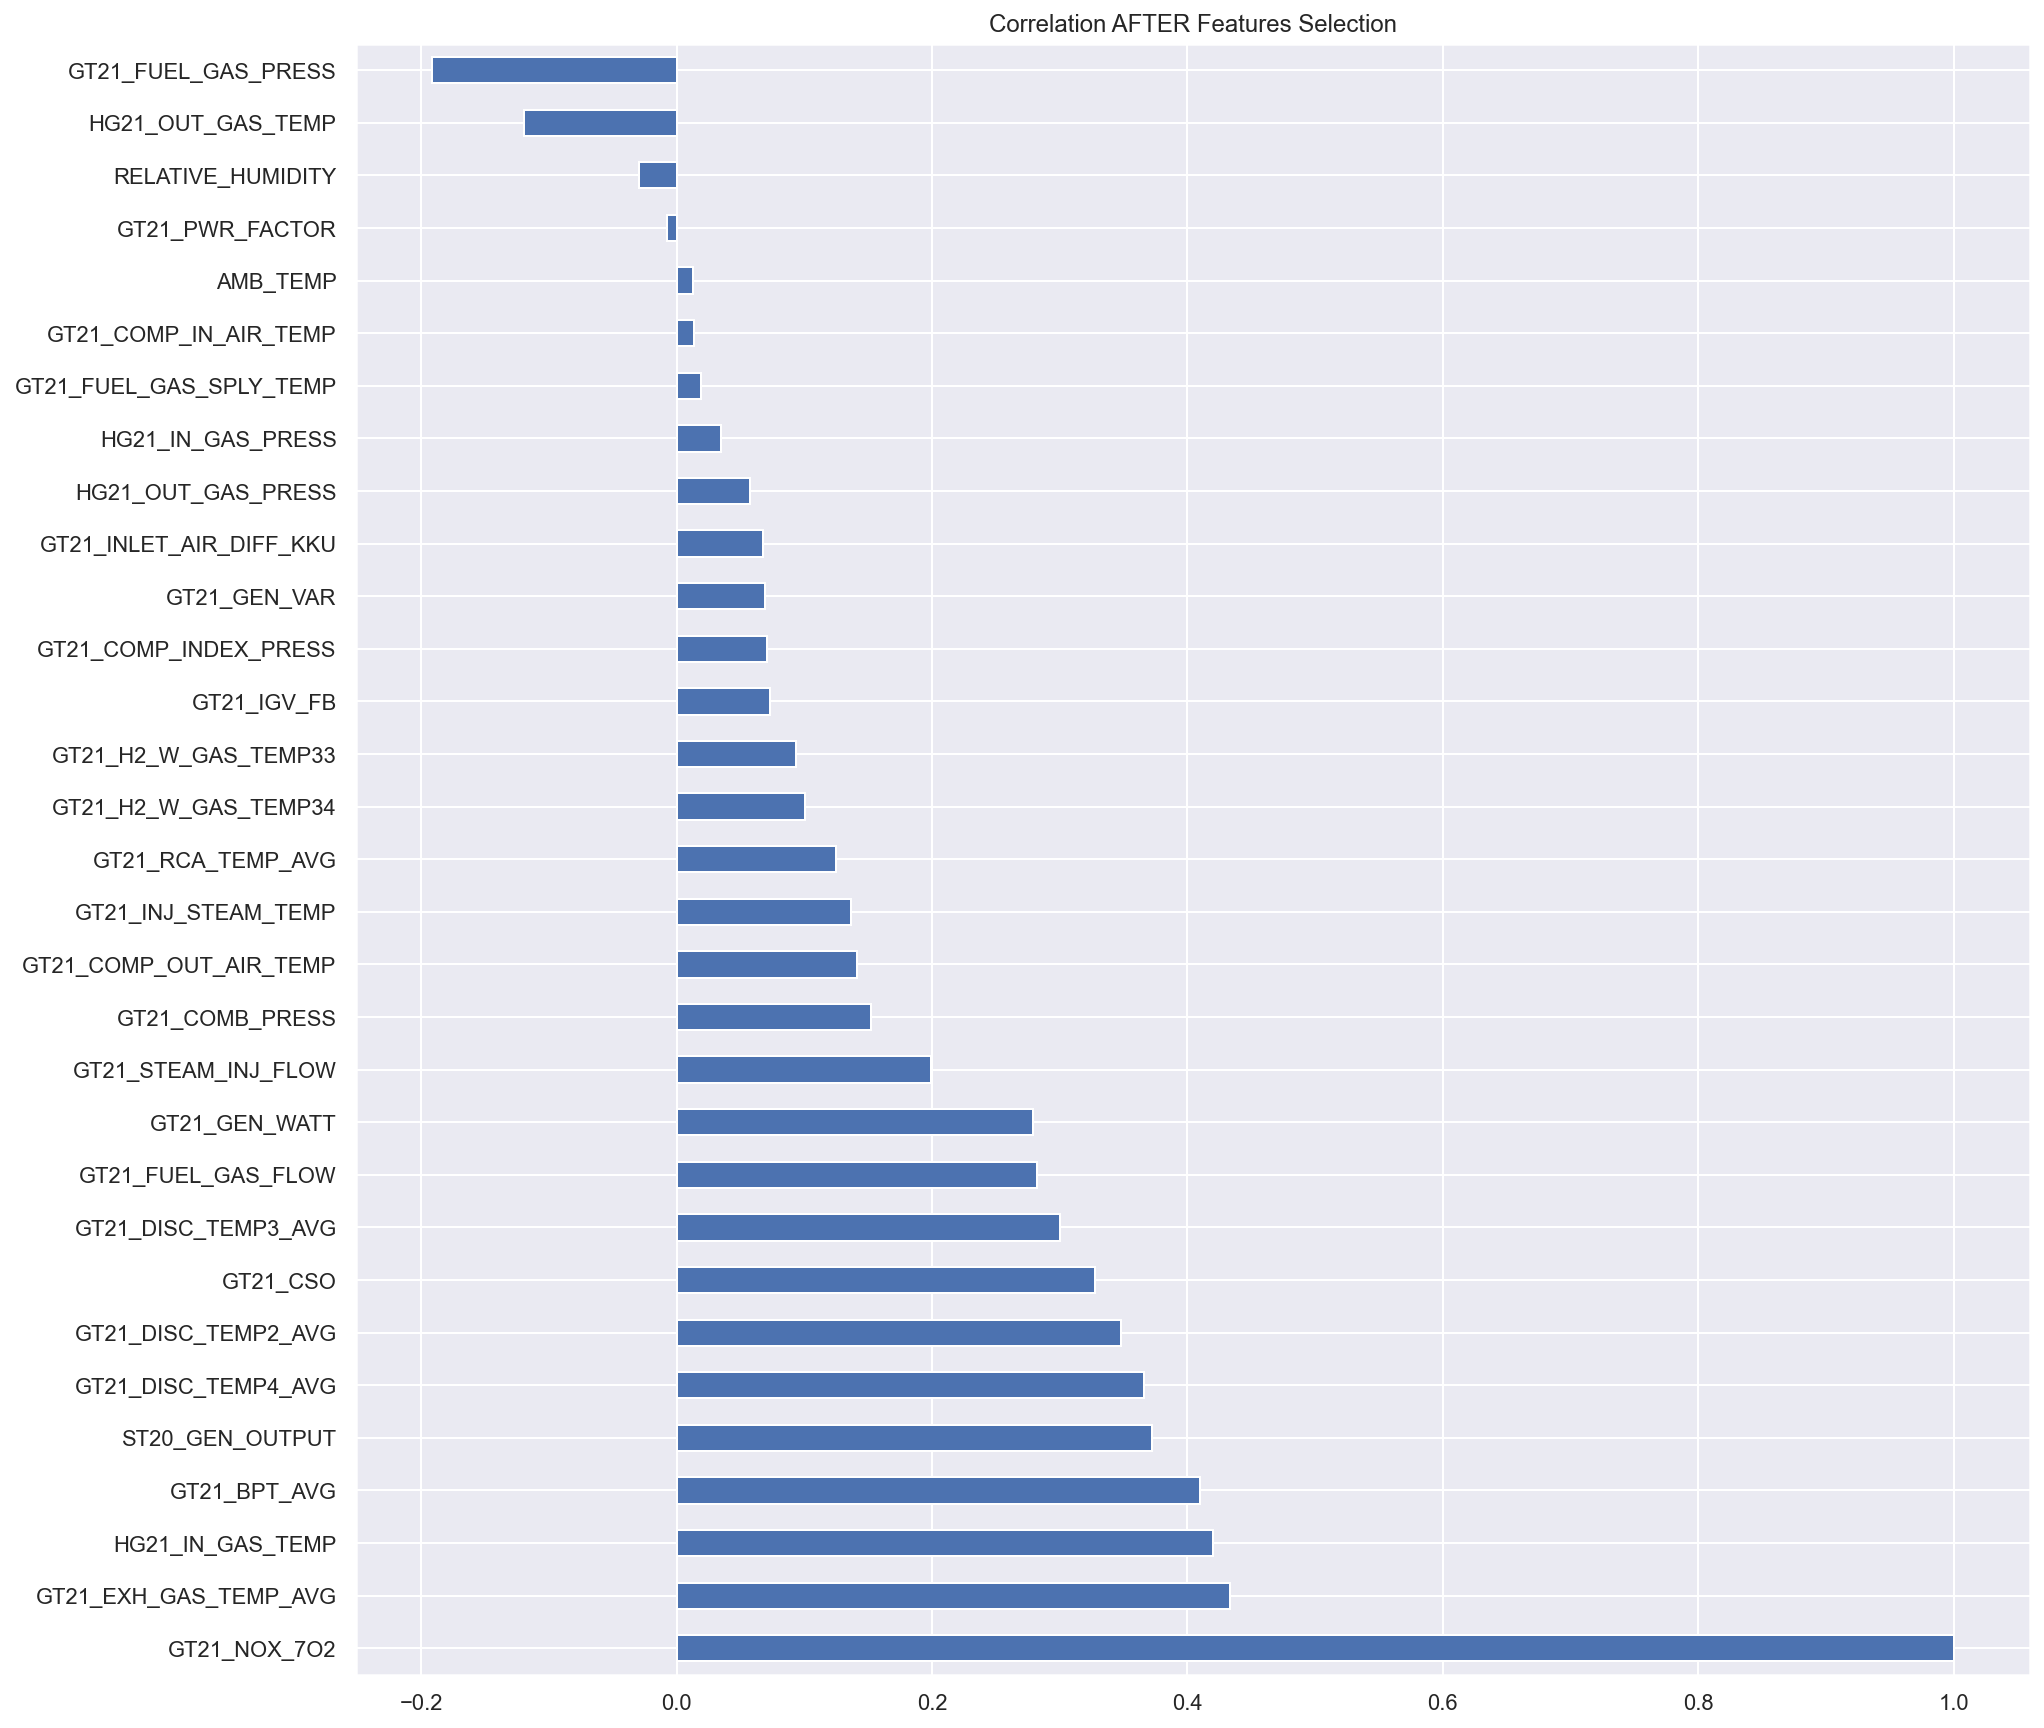

In [15]:
plt.title('Correlation AFTER Features Selection')
df[Selected_Features].corr()['GT21_NOX_7O2'].sort_values(ascending=False).plot(kind='barh',figsize=(15,15))

## Correlation Score

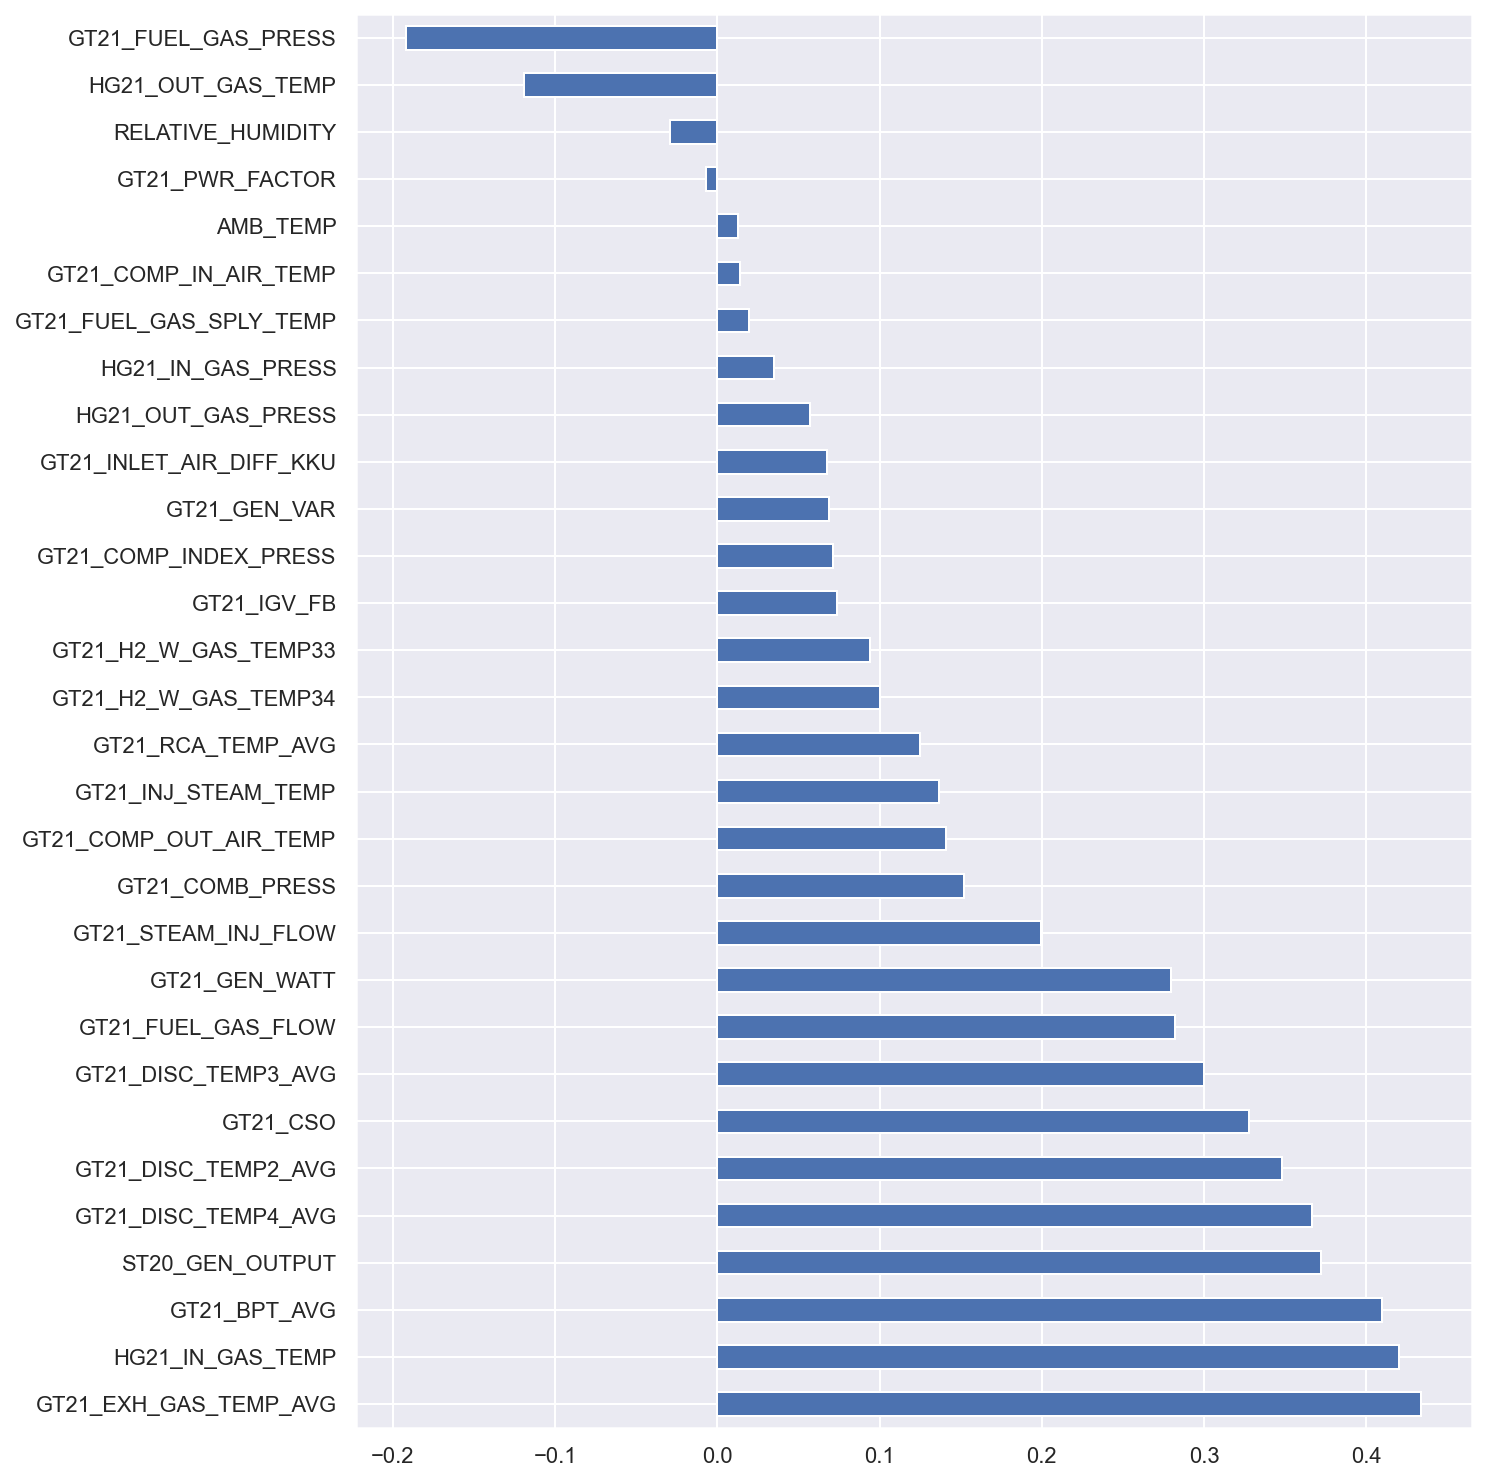

In [16]:
xx = df[Selected_Features].drop('GT21_NOX_7O2', axis=1).apply(lambda x: x.corr(df['GT21_NOX_7O2']))
Result = pd.DataFrame(xx,columns=['Correlation'])
Result['Correlation'].sort_values(ascending=False).plot(kind='barh',figsize=(10,13))
Result = np.abs(Result[['Correlation']])
Result = Result[['Correlation']]*100/Result[['Correlation']].sum()

In [17]:
Result

Correlation
GT21_GEN_WATT               5.318536
GT21_GEN_VAR                1.310870
GT21_PWR_FACTOR             0.137162
GT21_FUEL_GAS_PRESS         3.649121
GT21_CSO                    6.240185
GT21_IGV_FB                 1.399468
GT21_COMP_IN_AIR_TEMP       0.266944
GT21_BPT_AVG                7.794809
GT21_EXH_GAS_TEMP_AVG       8.255014
GT21_FUEL_GAS_FLOW          5.366738
GT21_FUEL_GAS_SPLY_TEMP     0.370971
GT21_STEAM_INJ_FLOW         3.793836
GT21_COMP_OUT_AIR_TEMP      2.686095
GT21_COMB_PRESS             2.892704
GT21_H2_W_GAS_TEMP33        1.786043
GT21_H2_W_GAS_TEMP34        1.911060
GT21_INJ_STEAM_TEMP         2.600696
GT21_COMP_INDEX_PRESS       1.352194
GT21_INLET_AIR_DIFF_KKU     1.286844
HG21_IN_GAS_PRESS           0.659802
HG21_OUT_GAS_PRESS          1.086936
HG21_IN_GAS_TEMP            7.998028
HG21_OUT_GAS_TEMP           2.267703
ST20_GEN_OUTPUT             7.082042
AMB_TEMP                    0.241591
RELATIVE_HUMIDITY           0.559564
GT21_RCA_TEMP_AVG           2.375683
GT21_DISC_TEMP2_AVG         6.629385
GT21_DISC_TEMP3_AVG         5.708289
GT21_DISC_TEMP4_AVG         6.971687

# Prediction & Show Feature importance

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Show Feature Importance and Concat Data
def showandconcat(model_name,importance,Result):
    f_imp = pd.DataFrame(importance, index= train.columns,columns=[model_name])
    f_imp.sort_values(by=[model_name],ascending=False)
    
    f_imp.sort_values(by=[model_name],ascending=True).plot(kind='barh',figsize=(8,9))
    title = 'GT21 Features Important from '+model_name
    plt.title(title)
    
    f_imp_p = np.abs(f_imp)*100/np.abs(f_imp).sum()
    Result = pd.concat([Result,f_imp_p],axis=1)
    Result = Result.loc[:,~Result.columns.duplicated()]
    return Result

In [20]:
#Show Testing and Prediction
def showtestpredict(model_name,y_test_org,y_pred_org):
    
    plt.figure(figsize=(20,10))
    plt.title('GT21 NOx Prediction from ' +model_name)
    plt.scatter(test.index,y_test_org,alpha=0.6,label='test')
    plt.scatter(test.index,y_pred_org,alpha=0.6,label='predict')
    plt.xlabel('Date-Time', fontsize=15)
    plt.ylabel('NOx(ppm)', fontsize=15)
    plt.legend()

In [21]:
#Concat Accurracy DF
def concatacc(model_name,index_name,accuracy_df,accuracy):
    
    print(f'Testing {index_name} = {accuracy:.4f}')
    accuracy_tmp = pd.DataFrame(accuracy,columns=[model_name],index=[index_name])
    accuracy_df = pd.concat([accuracy_df,accuracy_tmp],axis=1).drop_duplicates()
    accuracy_df = accuracy_df.loc[:,~accuracy_df.columns.duplicated()]

    return accuracy_df

## Data Standardization (Normalization)
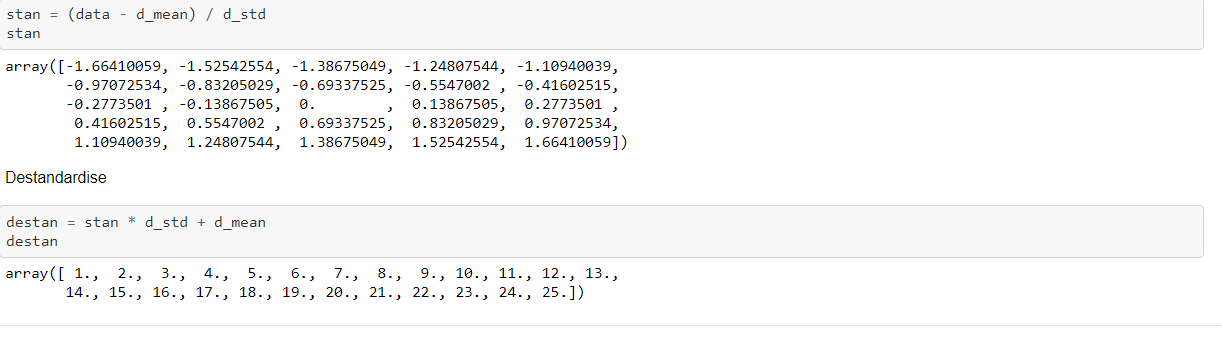

In [22]:
#Prepare Train/Test Data 70:30

train_org, test_org, y_train_org, y_test_org = train_test_split(df[Selected_Features].drop('GT21_NOX_7O2', axis=1), df['GT21_NOX_7O2'], test_size=0.30, random_state=1)

# Standardization
tr_mean = train_org.mean()
tr_std = train_org.std()

train = (train_org - tr_mean)/tr_std
test = (test_org - tr_mean)/tr_std  #use training mean and std


y_train_mean = y_train_org.mean()
y_train_std = y_train_org.std()  

y_train = (y_train_org-y_train_mean)/y_train_std
y_test = (y_test_org-y_train_mean)/y_train_std  #use training mean and std

In [23]:
#Monitor Train Test Ratio
print(f'train shape = {train.shape}')
print(f'test shape = {test.shape}')
print(f'y_train shape = {y_train.shape}')
print(f'y_test shape = {y_test.shape}')

train shape = (24875, 30)
test shape = (10662, 30)
y_train shape = (24875,)
y_test shape = (10662,)


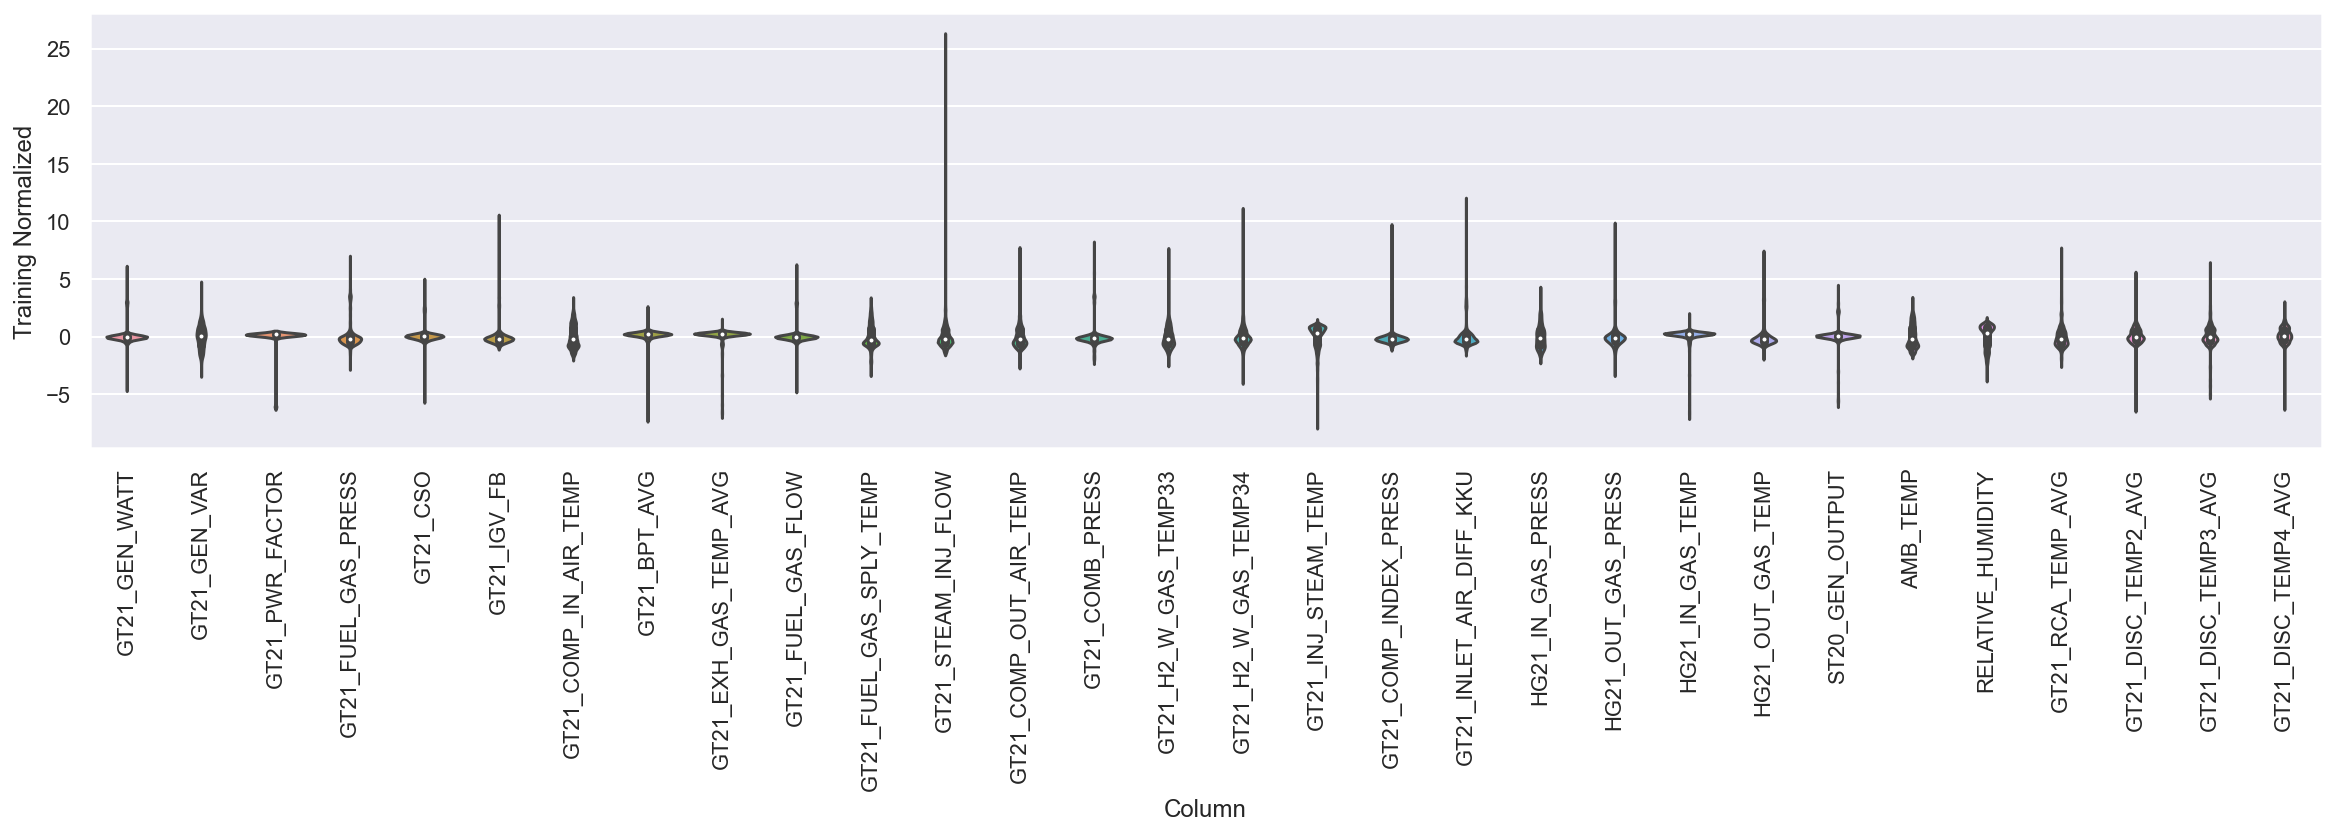

In [24]:
#Training Data after Standardization
df_std_melt = train.melt(var_name='Column', value_name='Training Normalized')
plt.figure(figsize=(20, 4))
ax = sns.violinplot(x='Column', y='Training Normalized', data=df_std_melt)
ax.set_xticklabels(train.keys(), rotation=90);

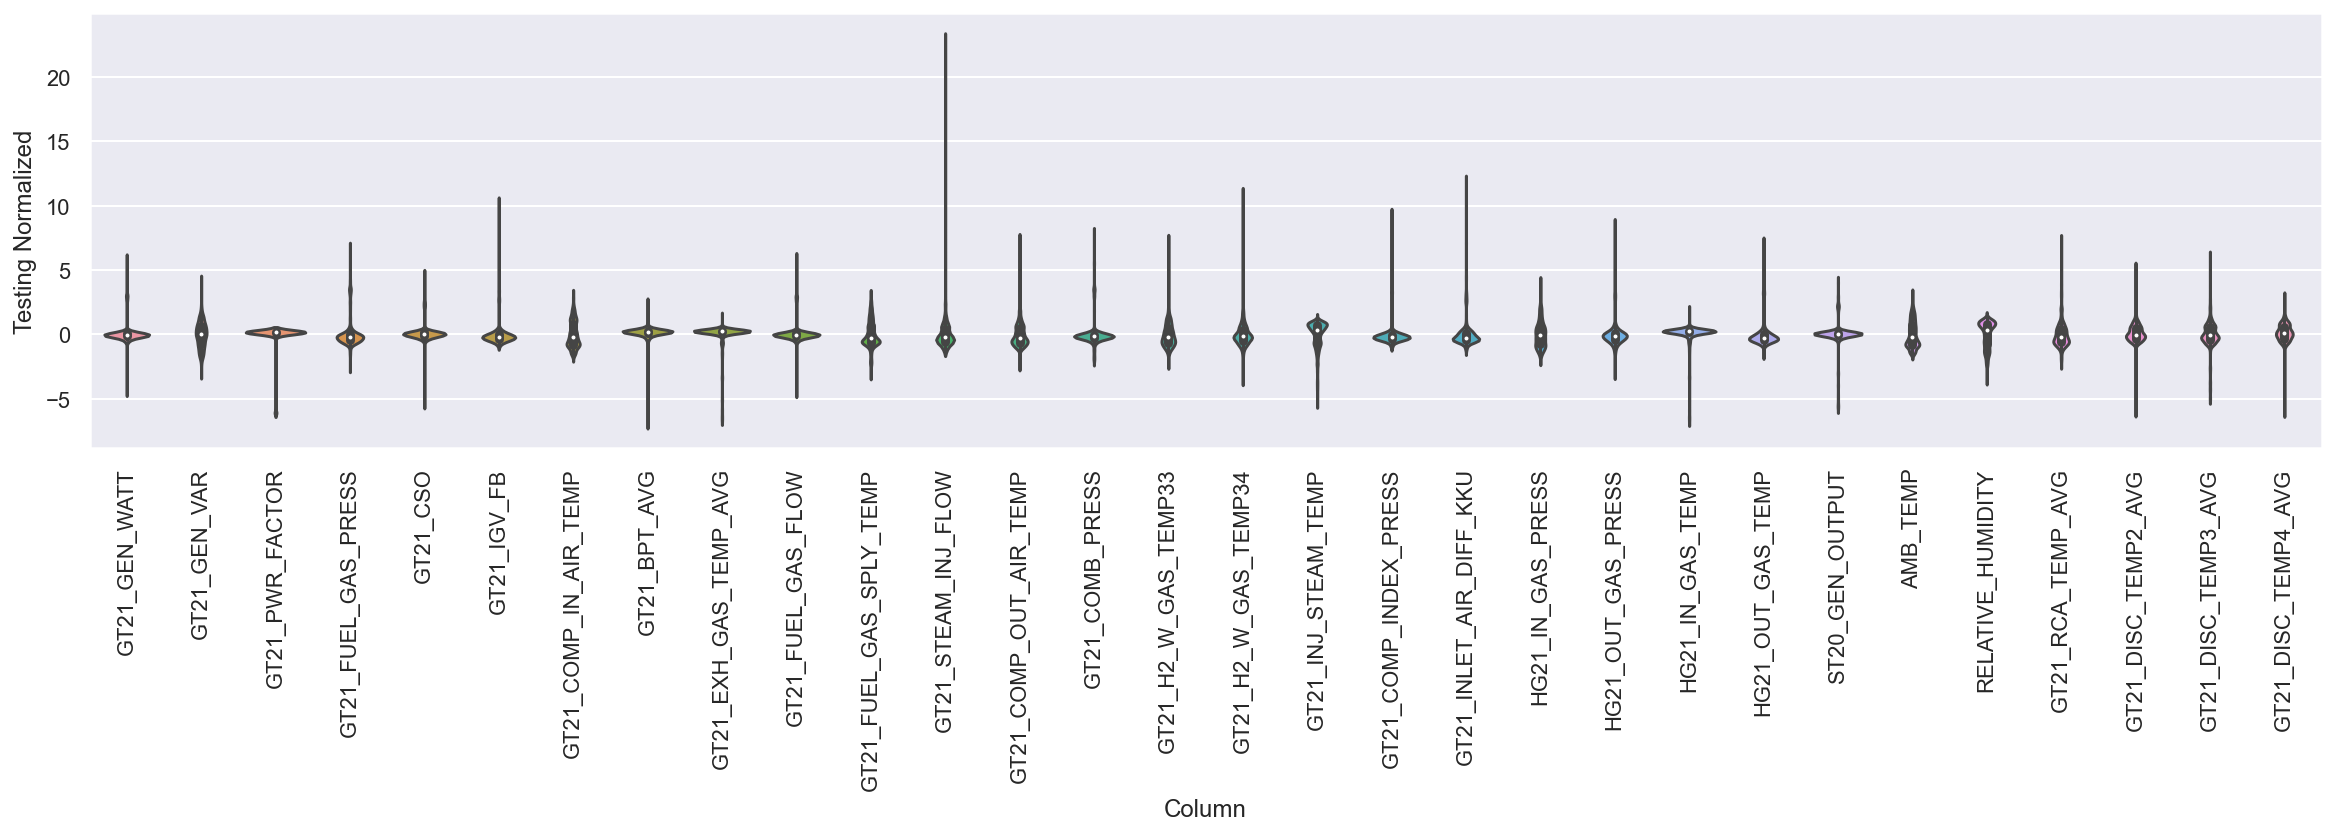

In [25]:
#Testing Data after Standardization
df_std_melt = test.melt(var_name='Column', value_name='Testing Normalized')
plt.figure(figsize=(20, 4))
ax = sns.violinplot(x='Column', y='Testing Normalized', data=df_std_melt)
ax.set_xticklabels(test.keys(), rotation=90);

## Linear Regression 

In [26]:
# ************* Create Initial Empty DF **********
empty_list = [] 
accuracy_mae = pd.DataFrame(empty_list)
accuracy_mape = pd.DataFrame(empty_list)
accuracy_mse = pd.DataFrame(empty_list)

### Prediction and Error Metric

Testing MAE(ppm) = 1.4479
Testing MAPE(%) = 0.6047
Testing MSE = 5.0123


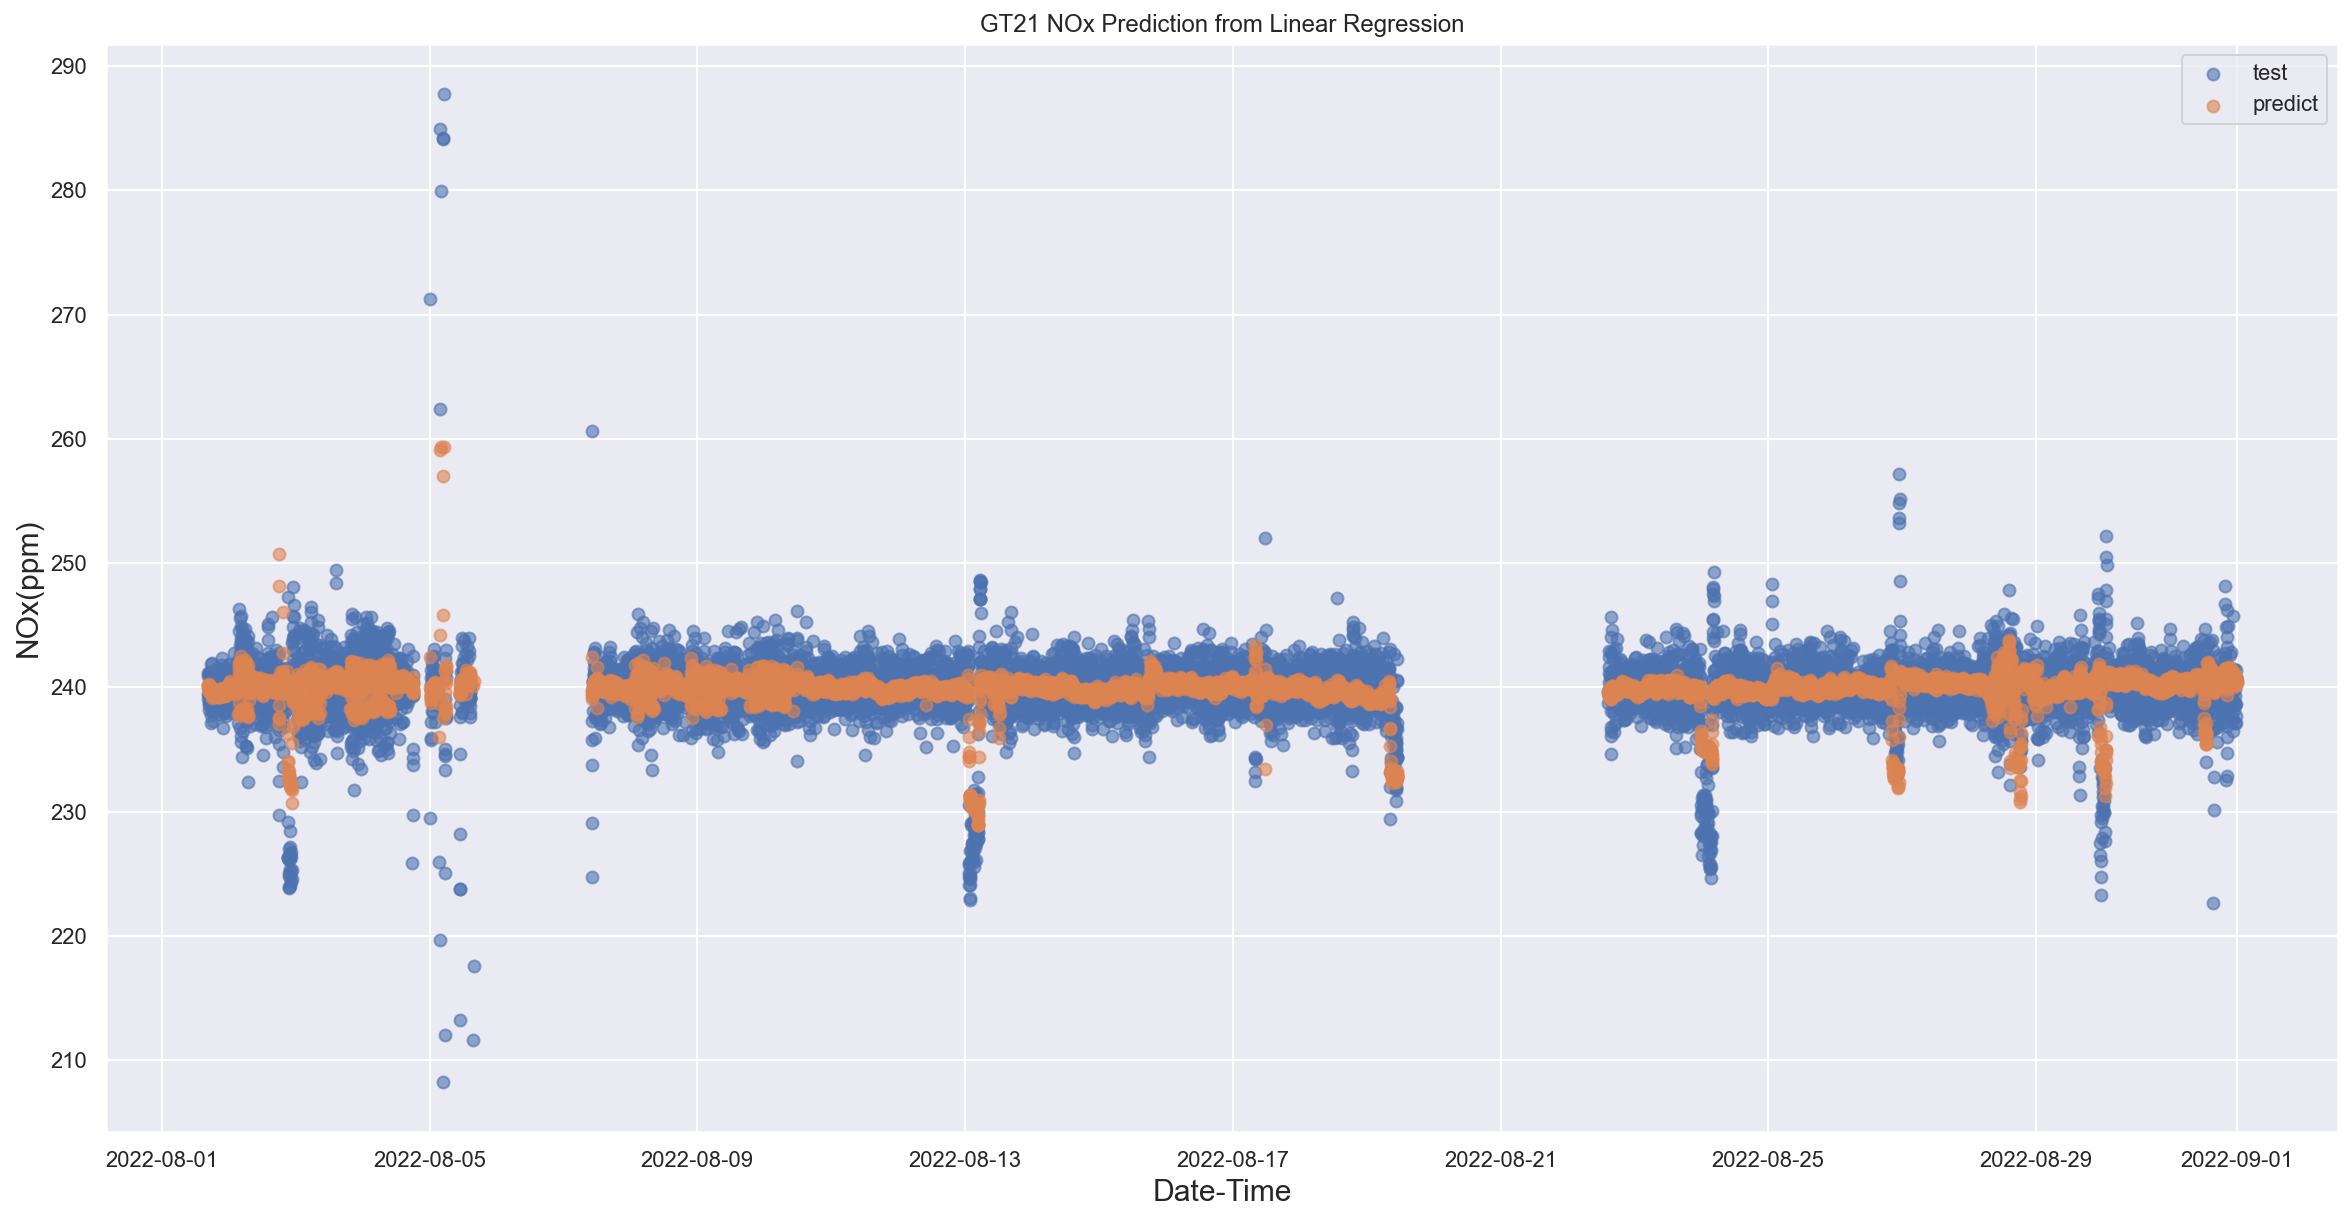

In [27]:
from sklearn.linear_model import LinearRegression

#Modeling
model = LinearRegression()
model.fit(train, y_train)

importance = model.coef_
importance

#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index)
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (------------DEBUG ONLY------------)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_LinearReg.xlsx')

#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('Linear Regression','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('Linear Regression','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('Linear Regression','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('Linear Regression',y_test_org,y_pred_org)

### Feature Importance

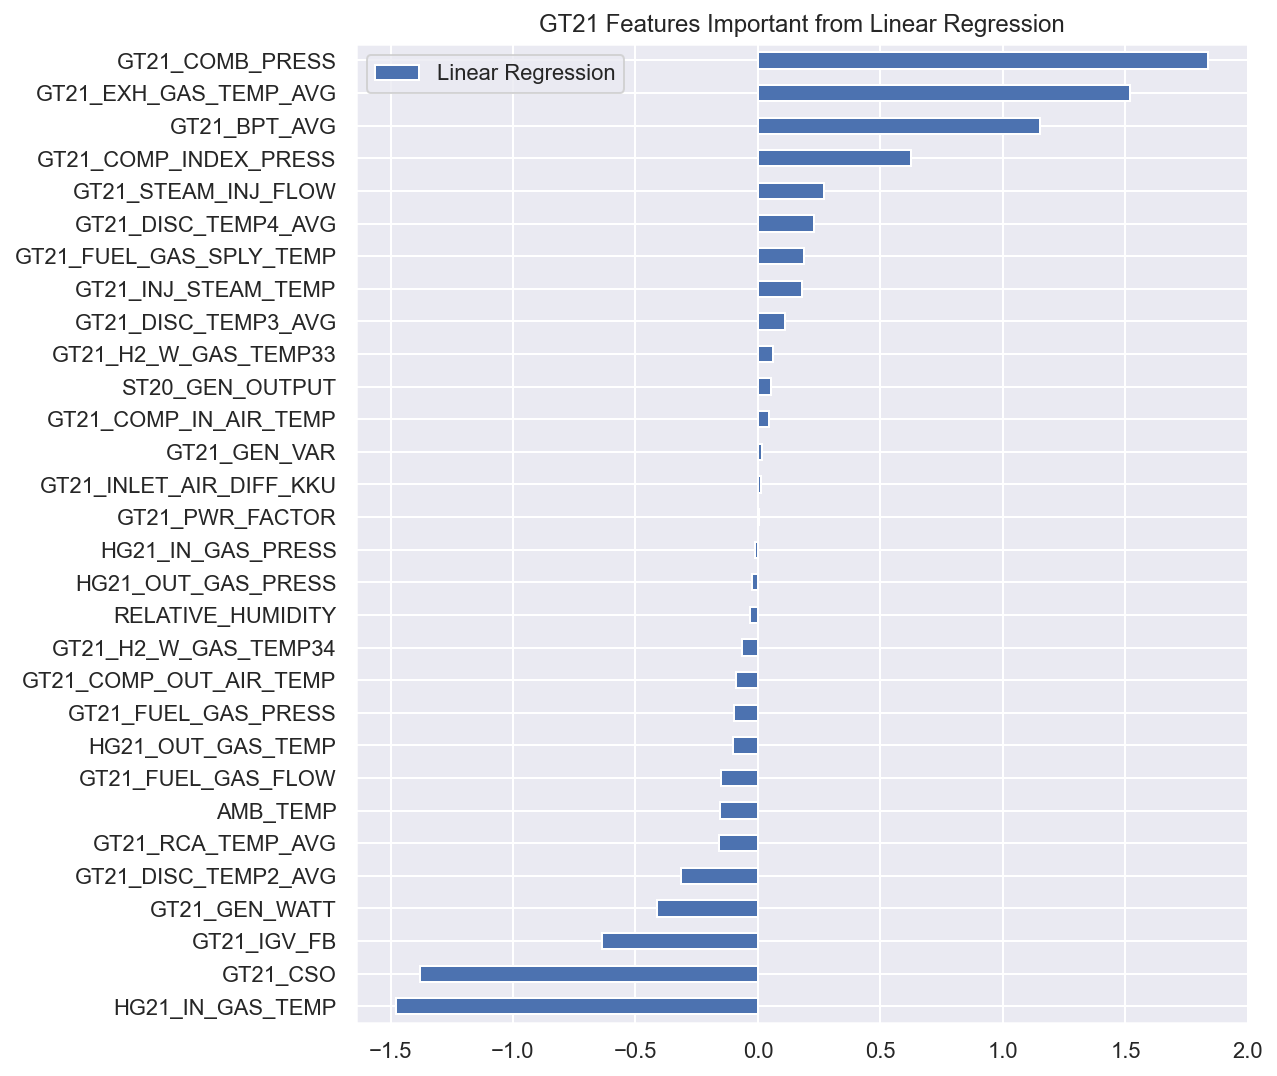

In [28]:
#Feature Importance
Result = showandconcat('Linear Regression',importance,Result)


## Decision Tree

### Prediction and Error Metric

Testing MAE(ppm) = 1.3399
Testing MAPE(%) = 0.5585
Testing MSE = 4.4888


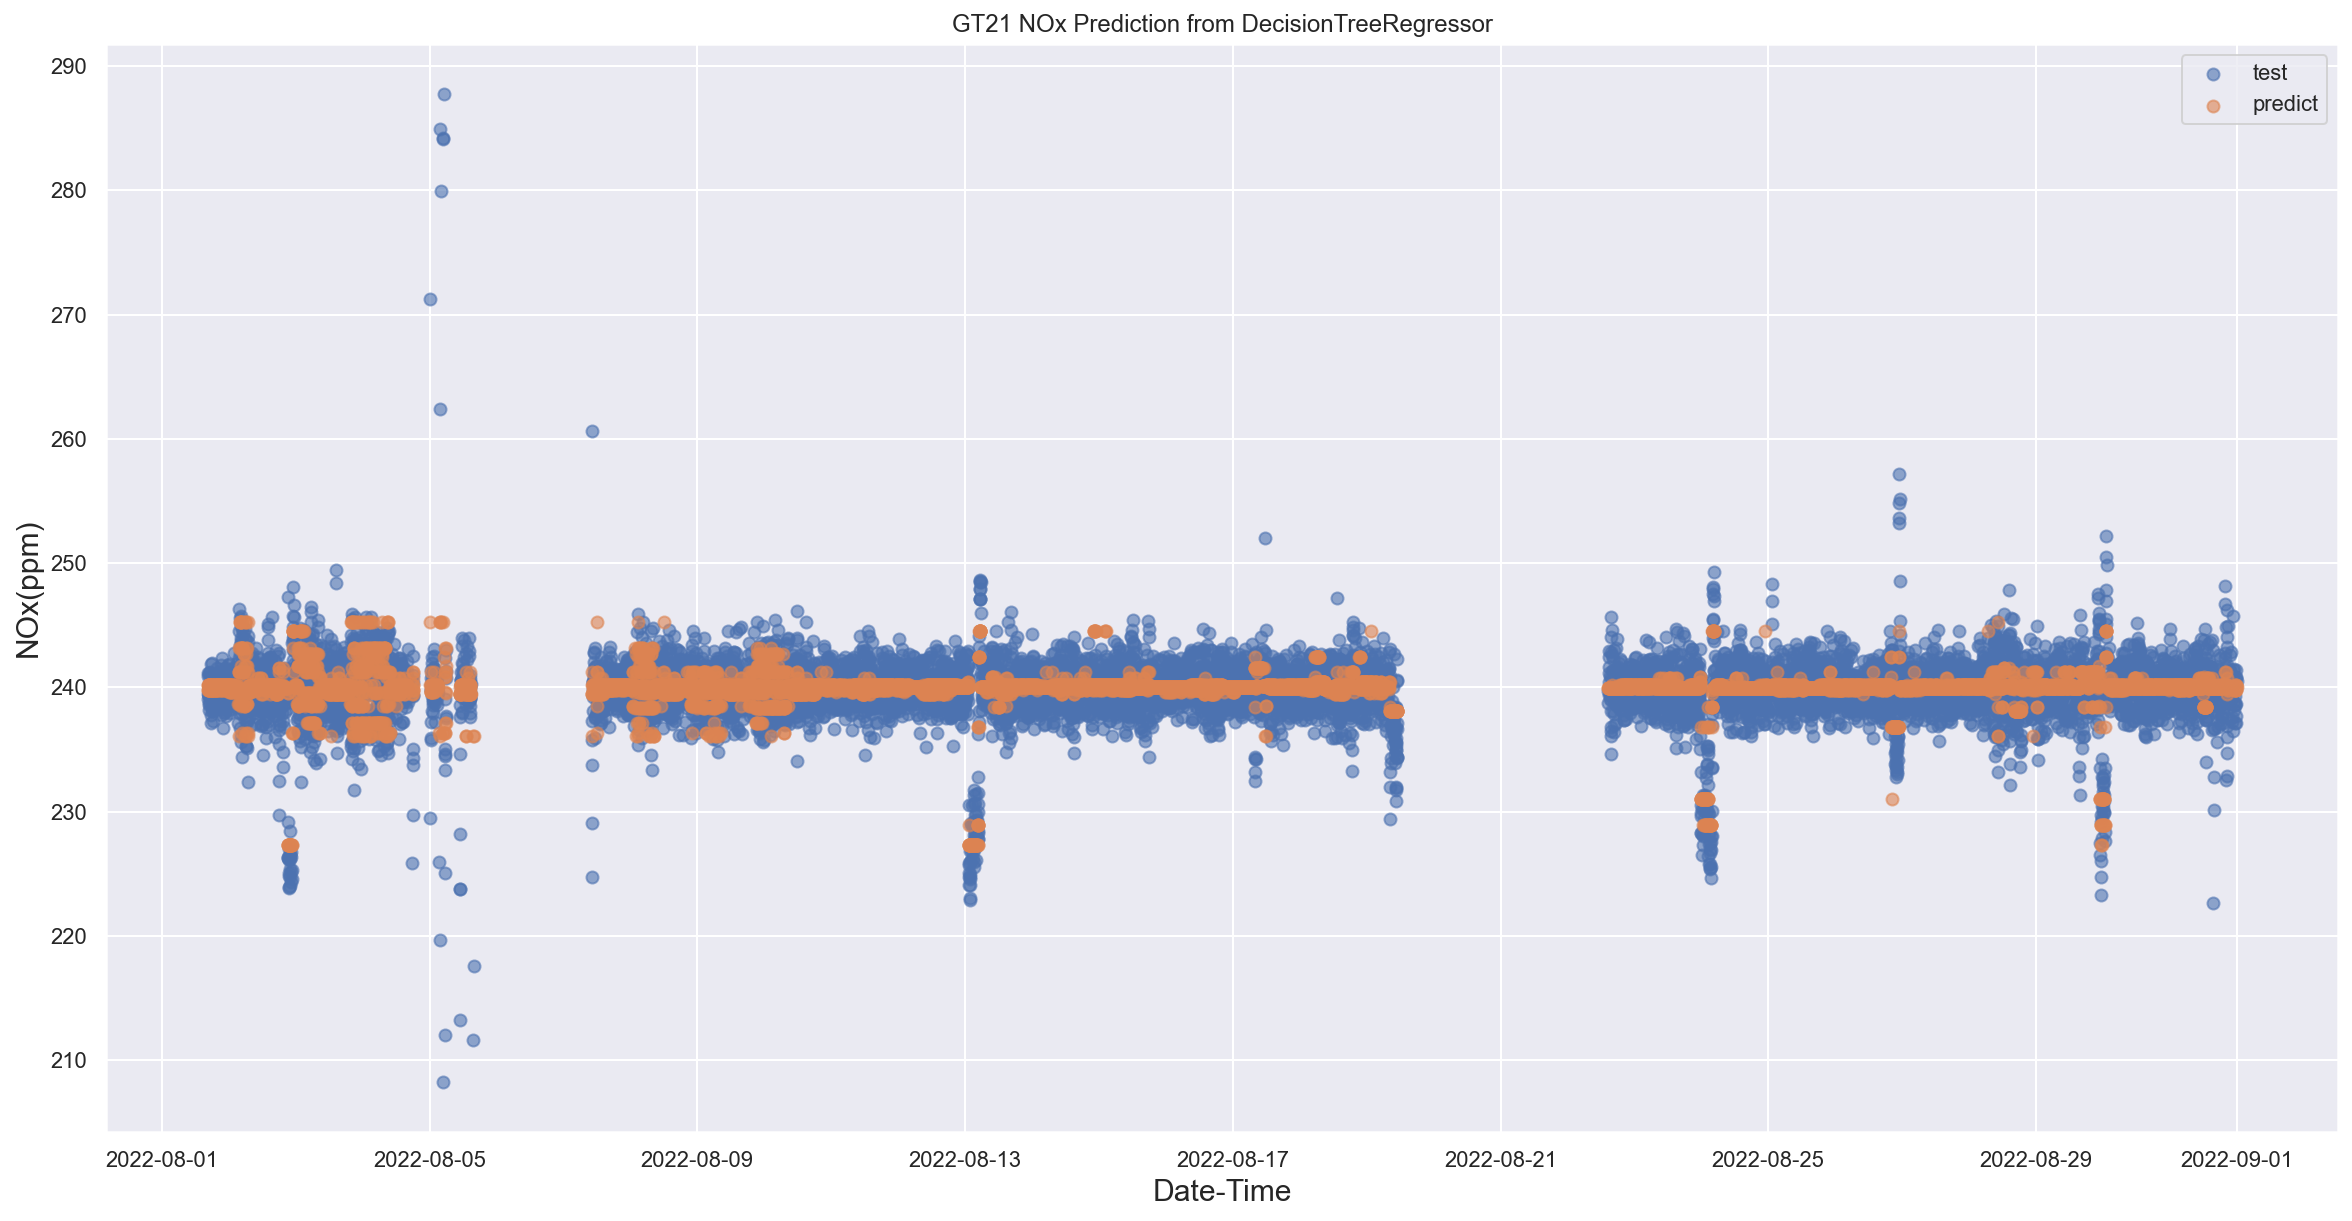

In [29]:
from sklearn.tree import DecisionTreeRegressor

#Modeling
model = DecisionTreeRegressor(criterion='mse',max_depth=8,max_leaf_nodes=100,min_samples_leaf=100,min_samples_split=10)
model.fit(train, y_train)
importance = model.feature_importances_

#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index) 
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (for DEBUG ONLY)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_DecisionTree.xlsx')

#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('DecisionTreeRegressor','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('DecisionTreeRegressor','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('DecisionTreeRegressor','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('DecisionTreeRegressor',y_test_org,y_pred_org)


### Feature Importance

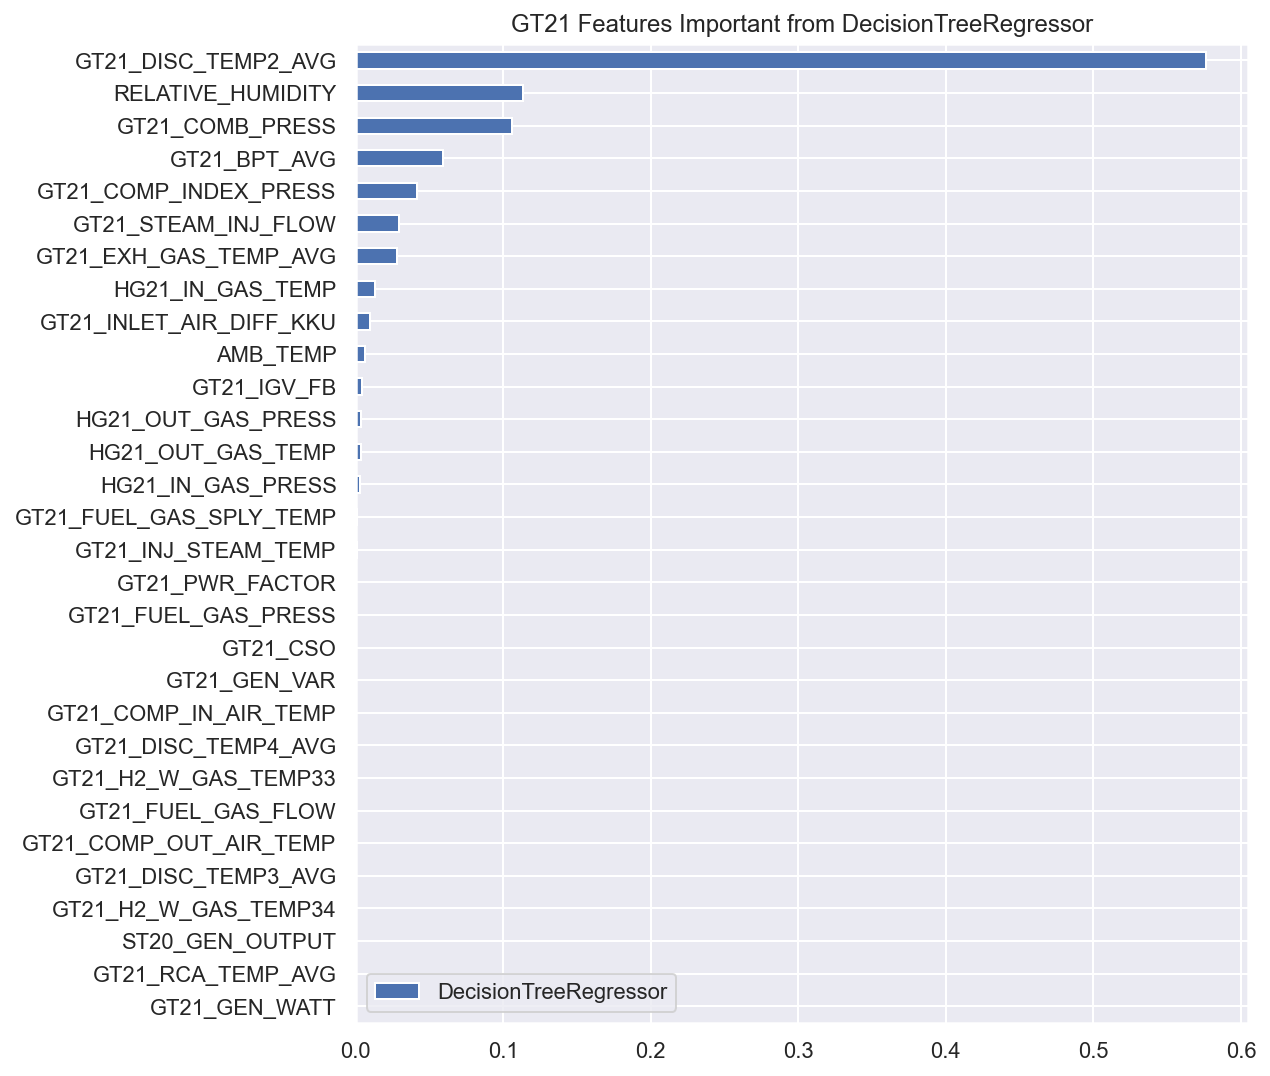

In [30]:
#Feature Importance
Result = showandconcat('DecisionTreeRegressor',importance,Result)


## Random Forest

### Prediction and Error Metric

Testing MAE(ppm) = 1.2037
Testing MAPE(%) = 0.5018
Testing MSE = 3.0025


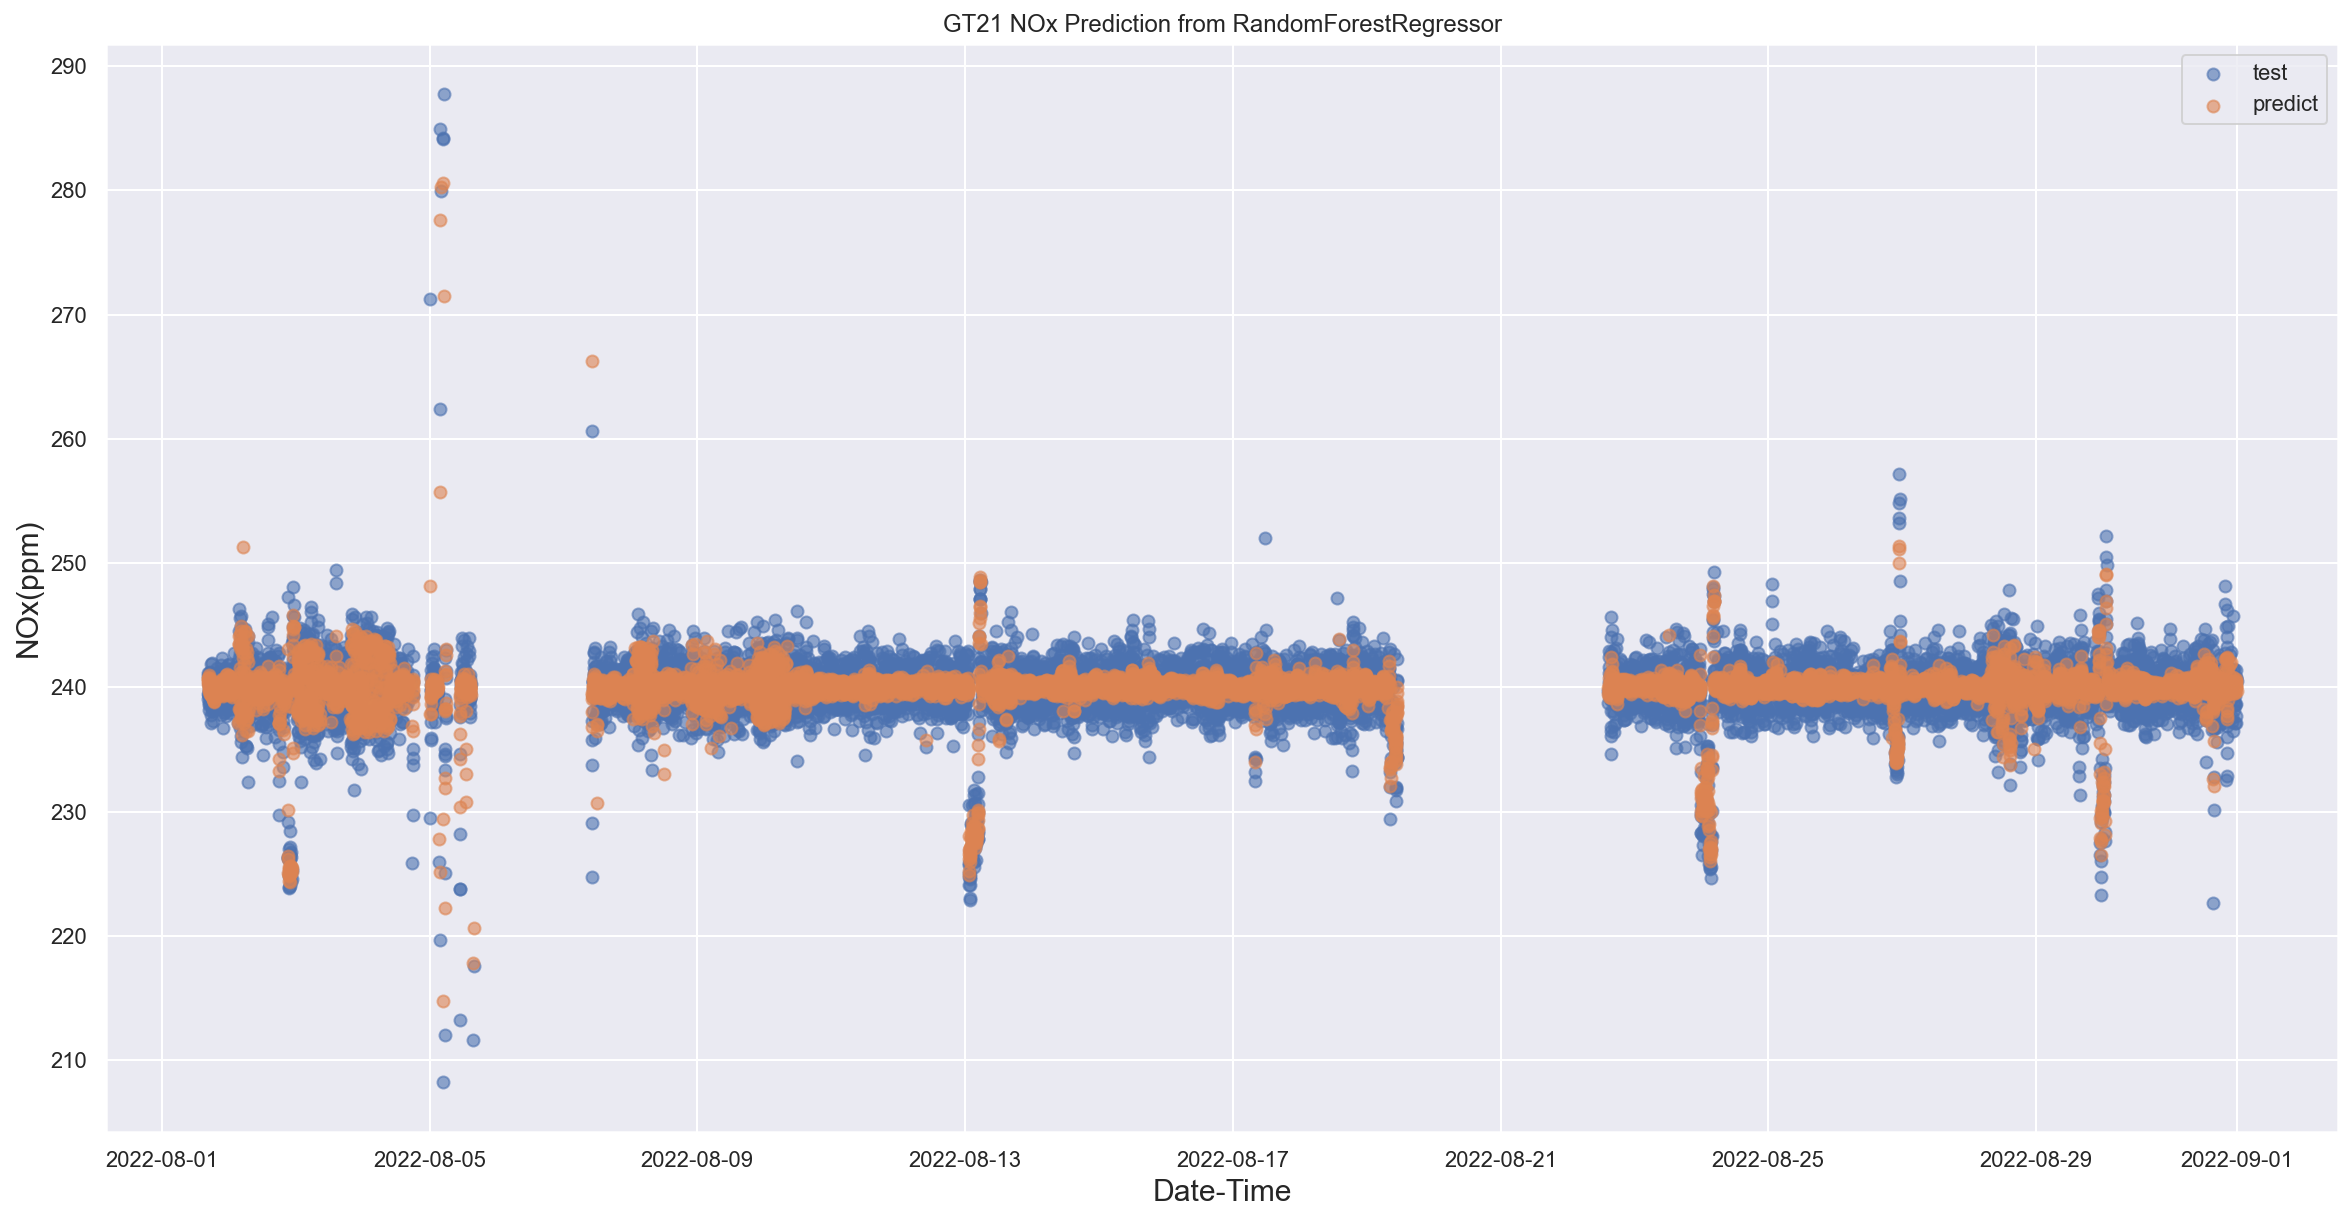

In [31]:
from sklearn.ensemble import RandomForestRegressor

#Modeling
model = RandomForestRegressor()
model.fit(train, y_train)
importance = model.feature_importances_

#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index) 
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (for DEBUG ONLY)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_RandomForest.xlsx')


#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('RandomForestRegressor','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('RandomForestRegressor','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('RandomForestRegressor','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('RandomForestRegressor',y_test_org,y_pred_org)


### Feature Importance

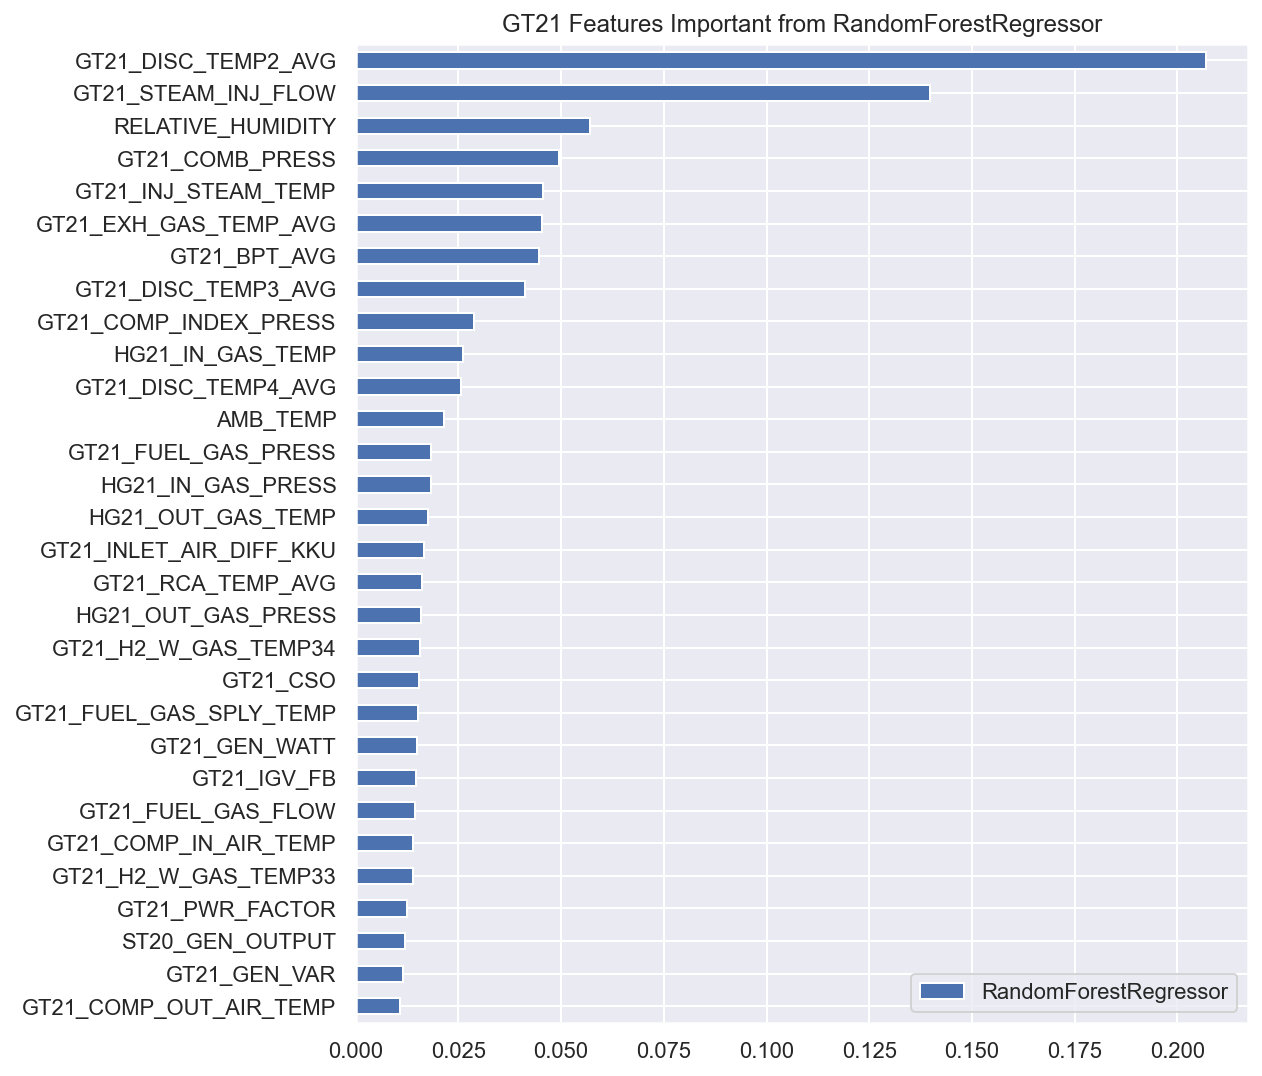

In [32]:
#Feature Importance
Result = showandconcat('RandomForestRegressor',importance,Result)


## XGBoost Regression

### Prediction and Error Metric

Testing MAE(ppm) = 1.2064
Testing MAPE(%) = 0.5028
Testing MSE = 2.9800


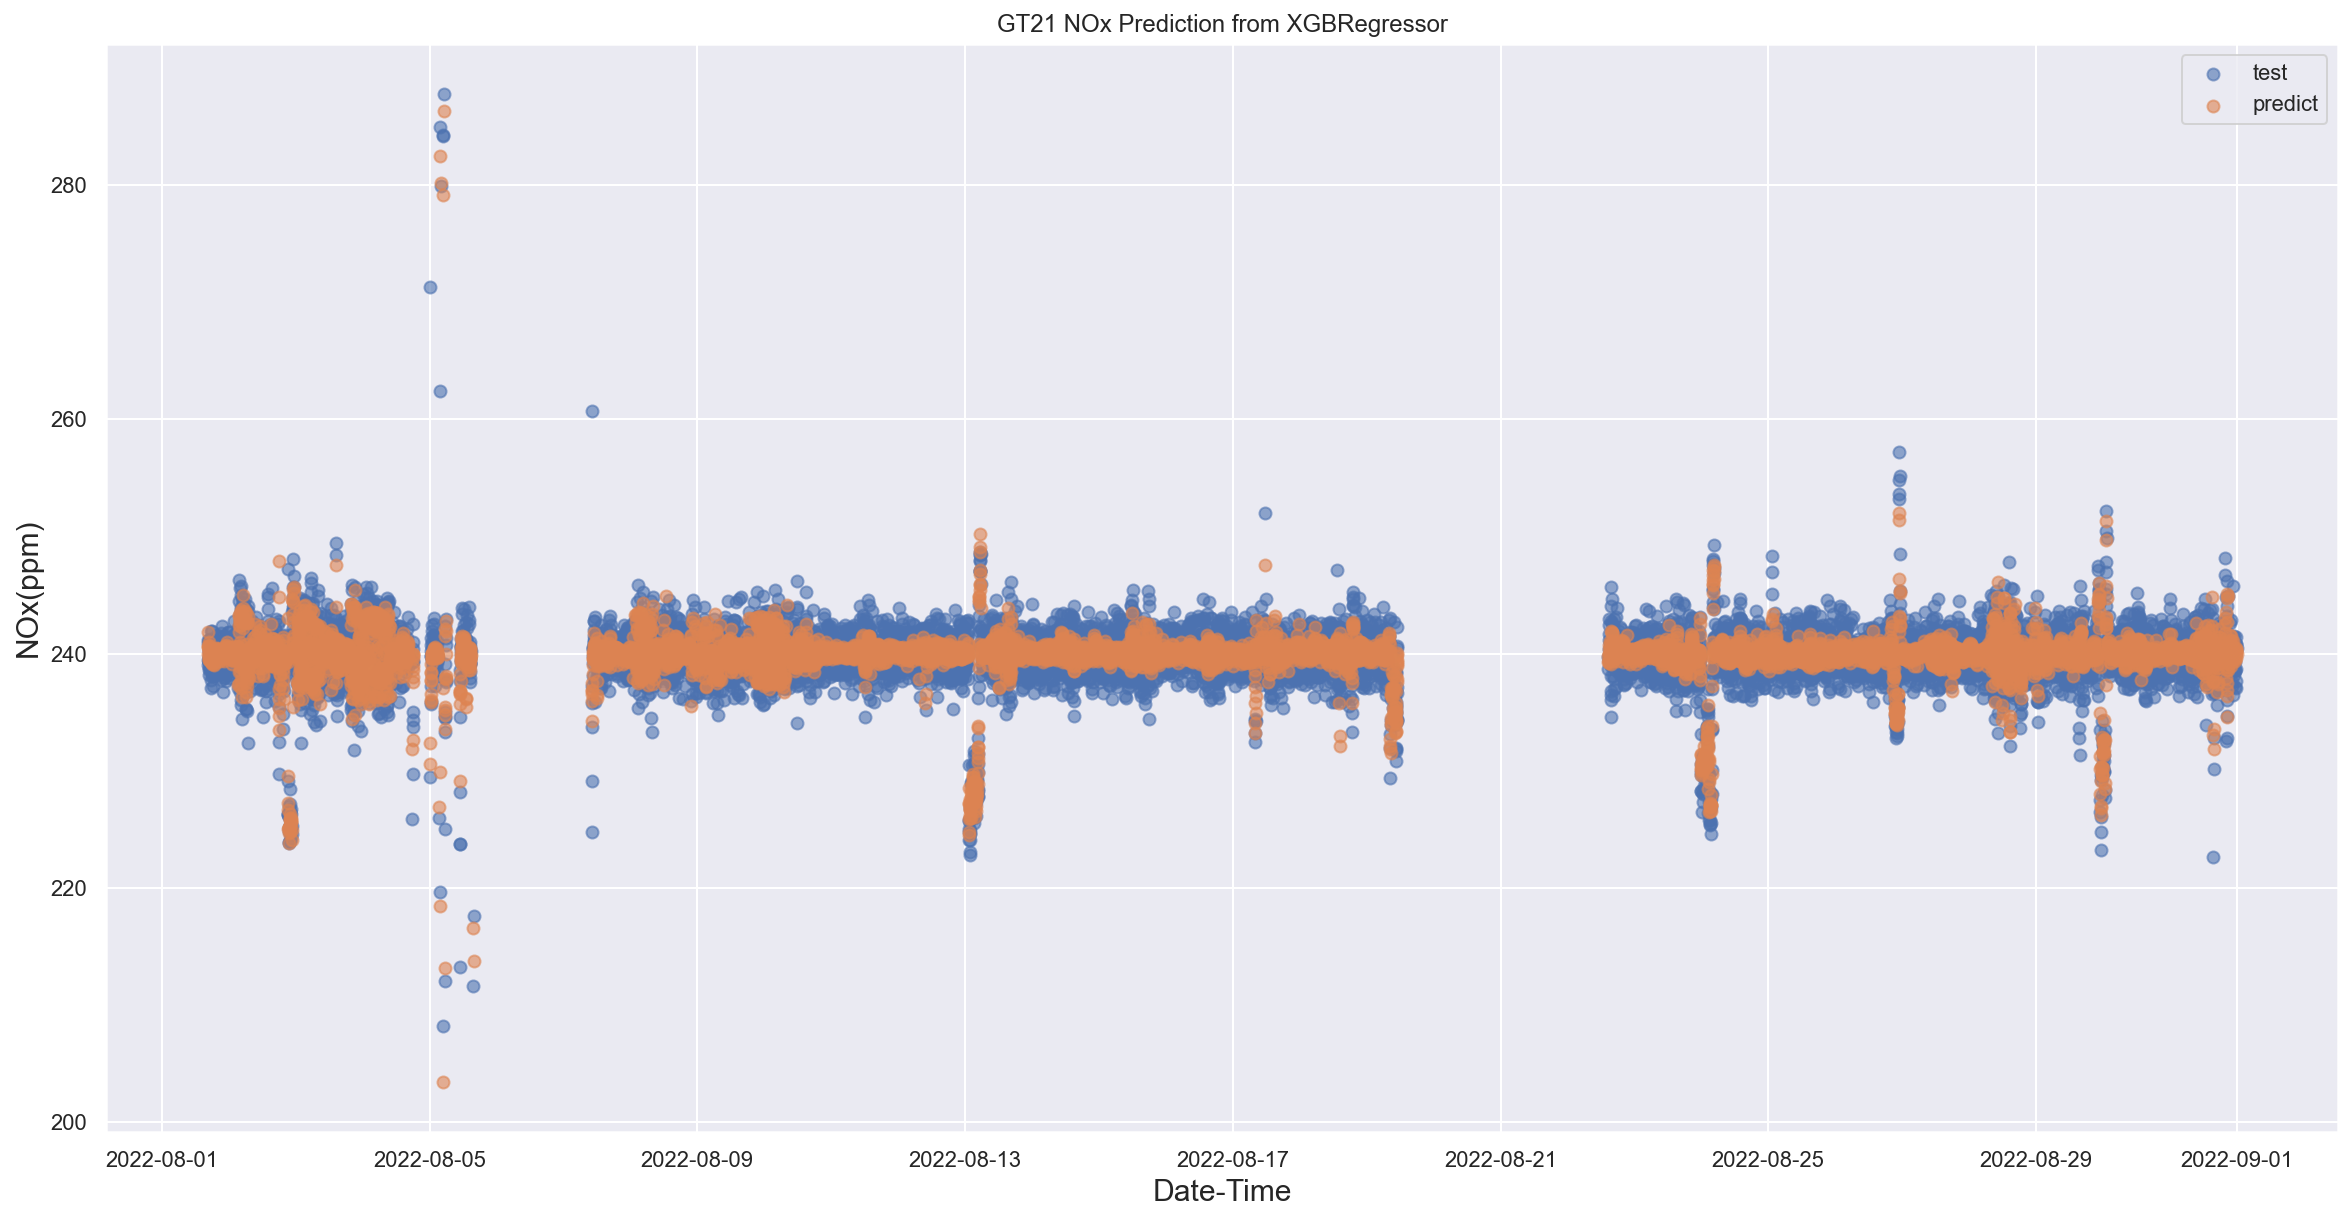

In [33]:
from xgboost import XGBRegressor

#Modeling
model = XGBRegressor()
model.fit(train, y_train)
importance = model.feature_importances_

#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index)
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (for DEBUG ONLY)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_XGBRegress.xlsx')

#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('XGBRegressor','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('XGBRegressor','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('XGBRegressor','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('XGBRegressor',y_test_org,y_pred_org)


###  Feature Importance

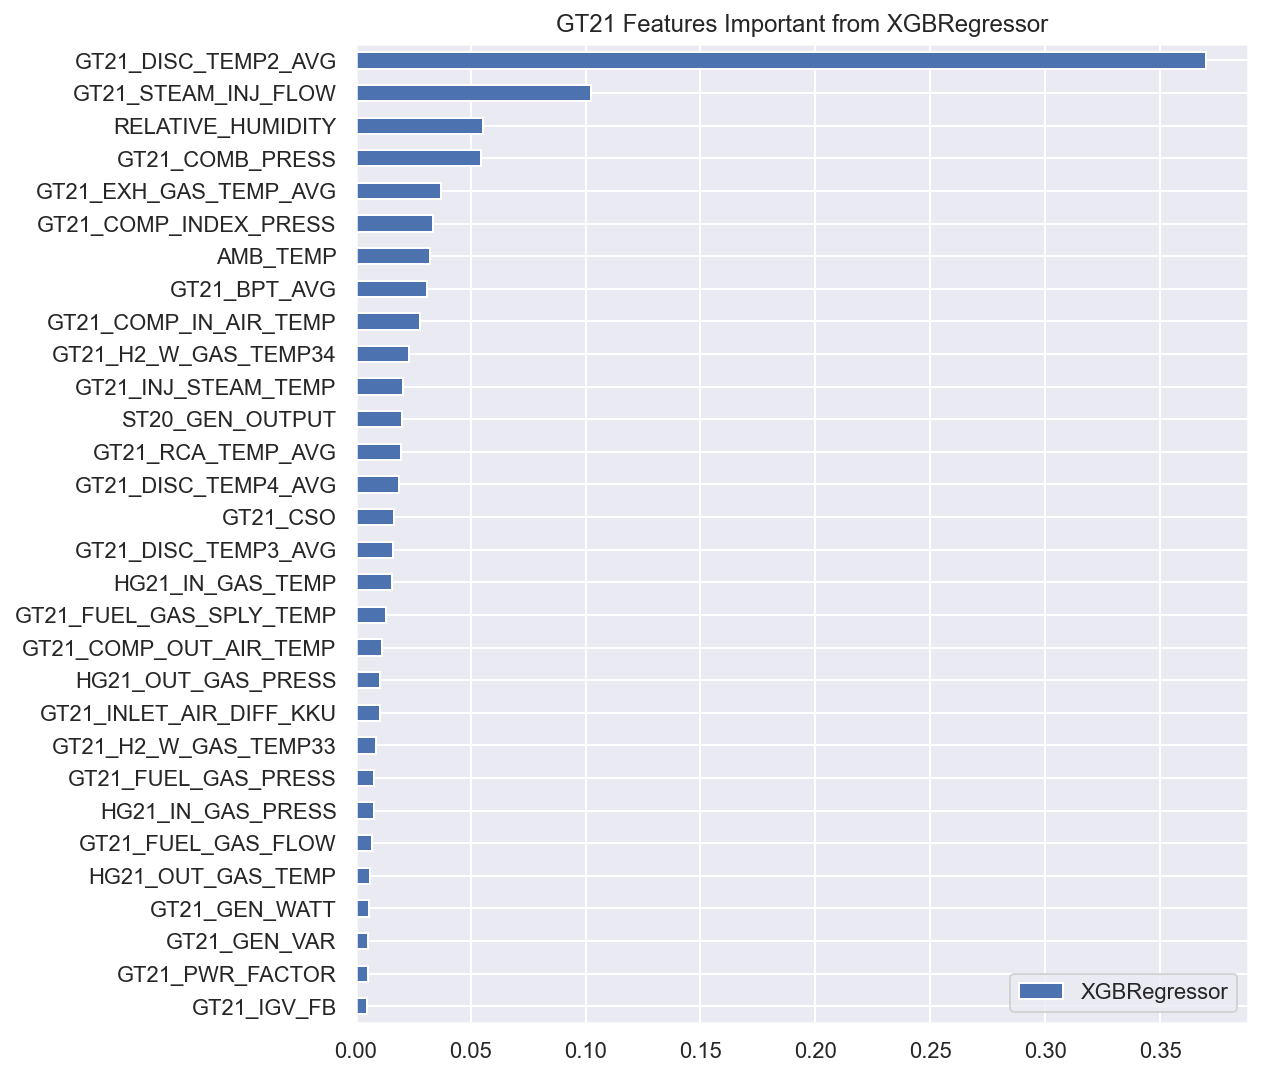

In [34]:
#Feature Importance
Result = showandconcat('XGBRegressor',importance,Result)


## K-NN Regression

### Prediction and Error Metric

Testing MAE(ppm) = 1.2937
Testing MAPE(%) = 0.5389
Testing MSE = 3.7273


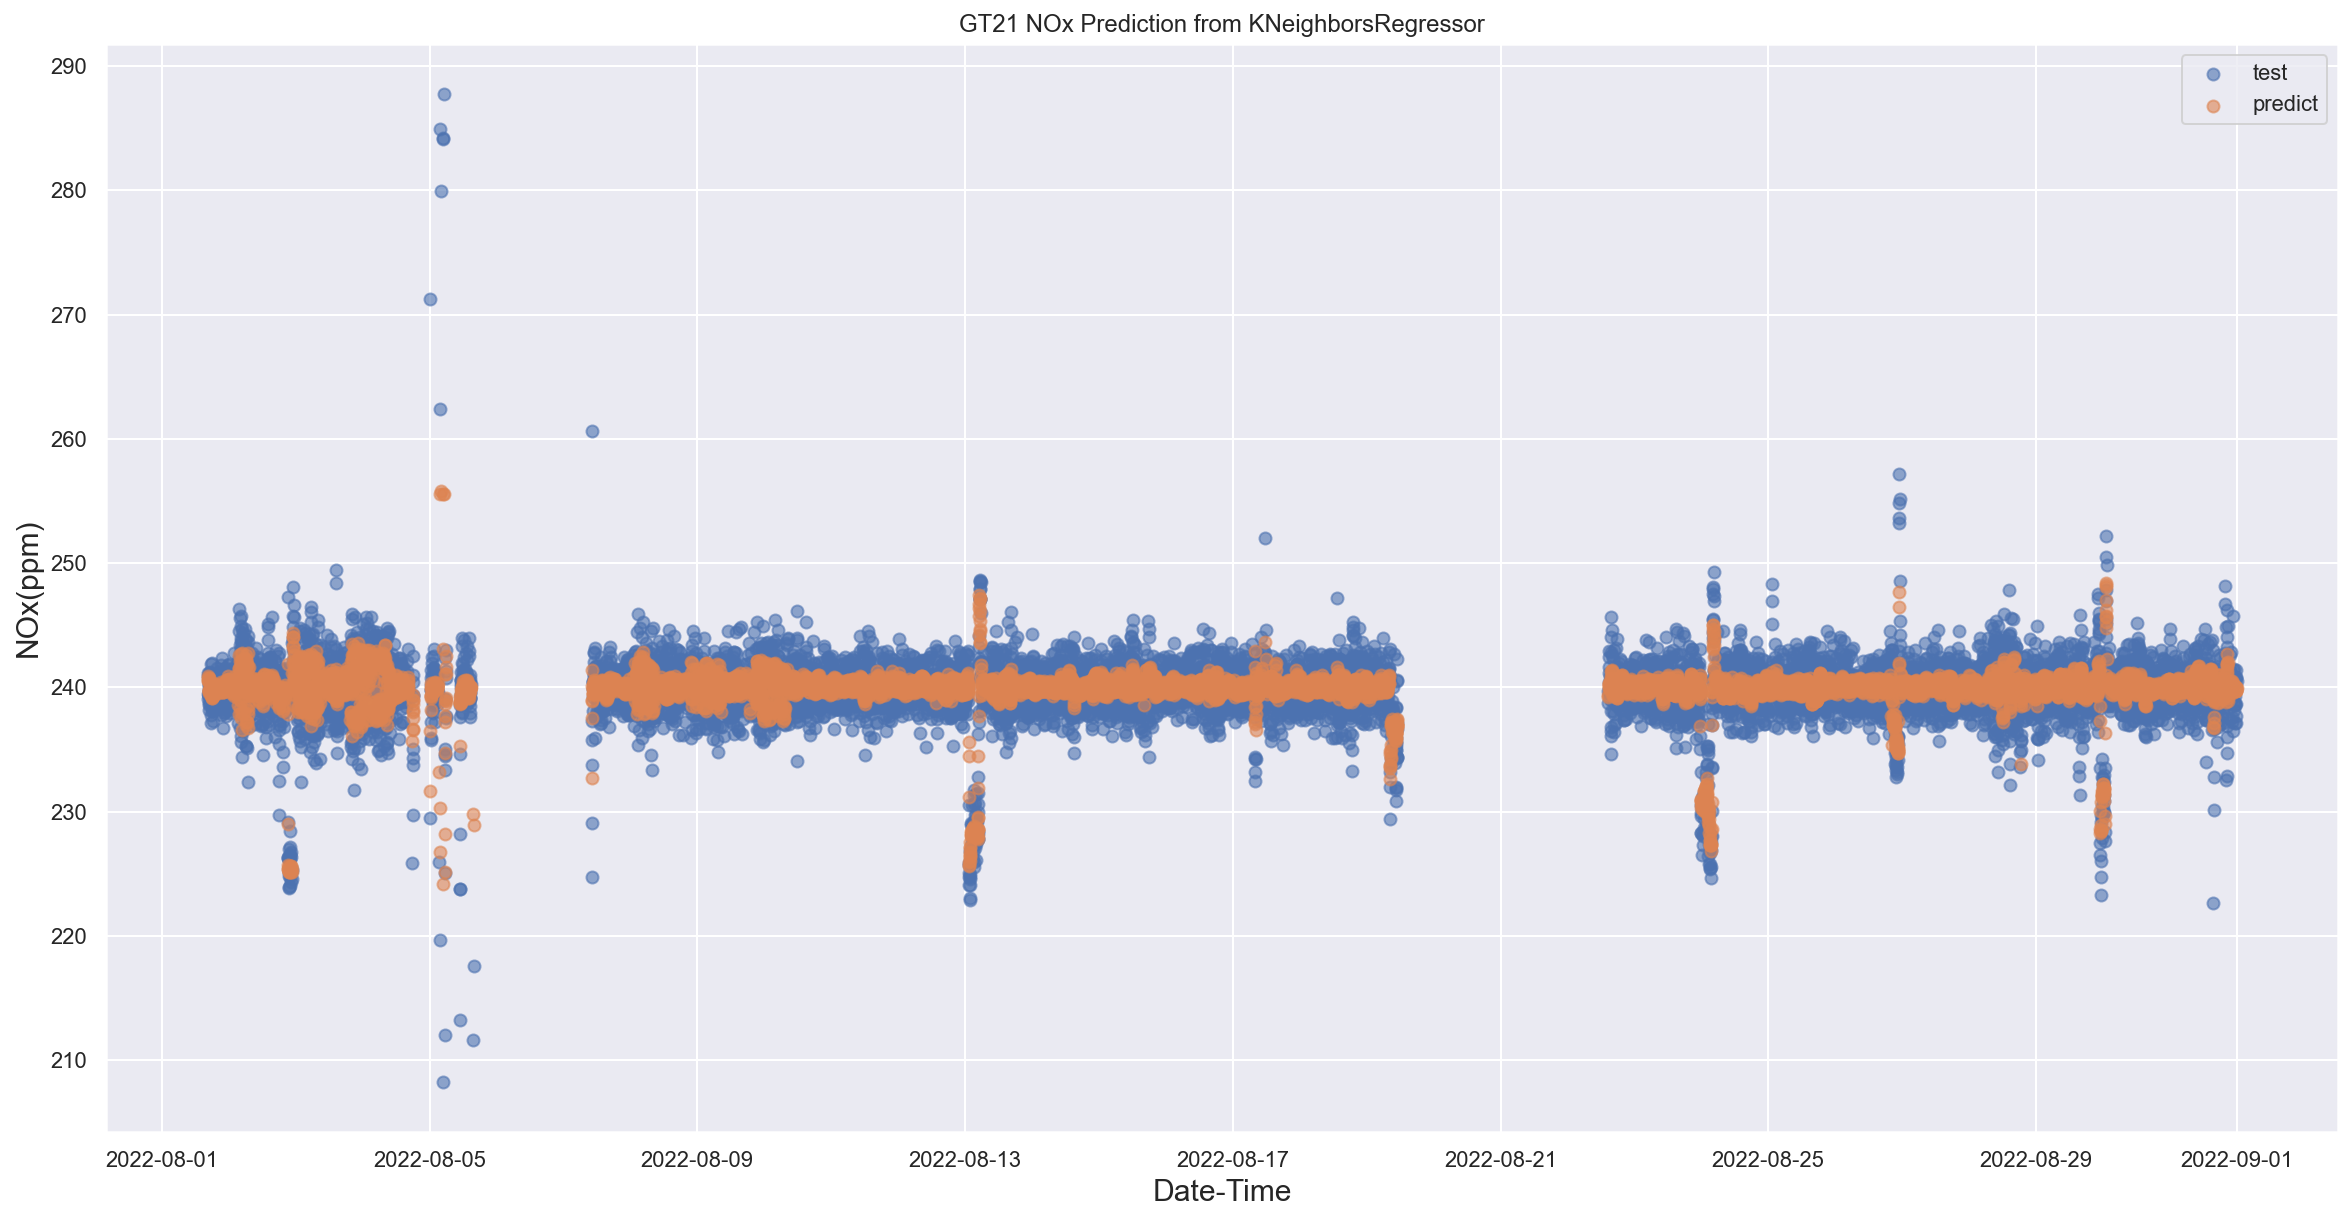

In [35]:
from sklearn.neighbors import KNeighborsRegressor

#Modeling
model = KNeighborsRegressor(n_neighbors= 19)
model.fit(train, y_train)

#Feature Importance Calculation
results = permutation_importance(model, train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean

#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index) 
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (for DEBUG ONLY)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_KNN.xlsx')

#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('KNeighborsRegressor','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('KNeighborsRegressor','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('KNeighborsRegressor','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('KNeighborsRegressor',y_test_org,y_pred_org)


### Feature Importance

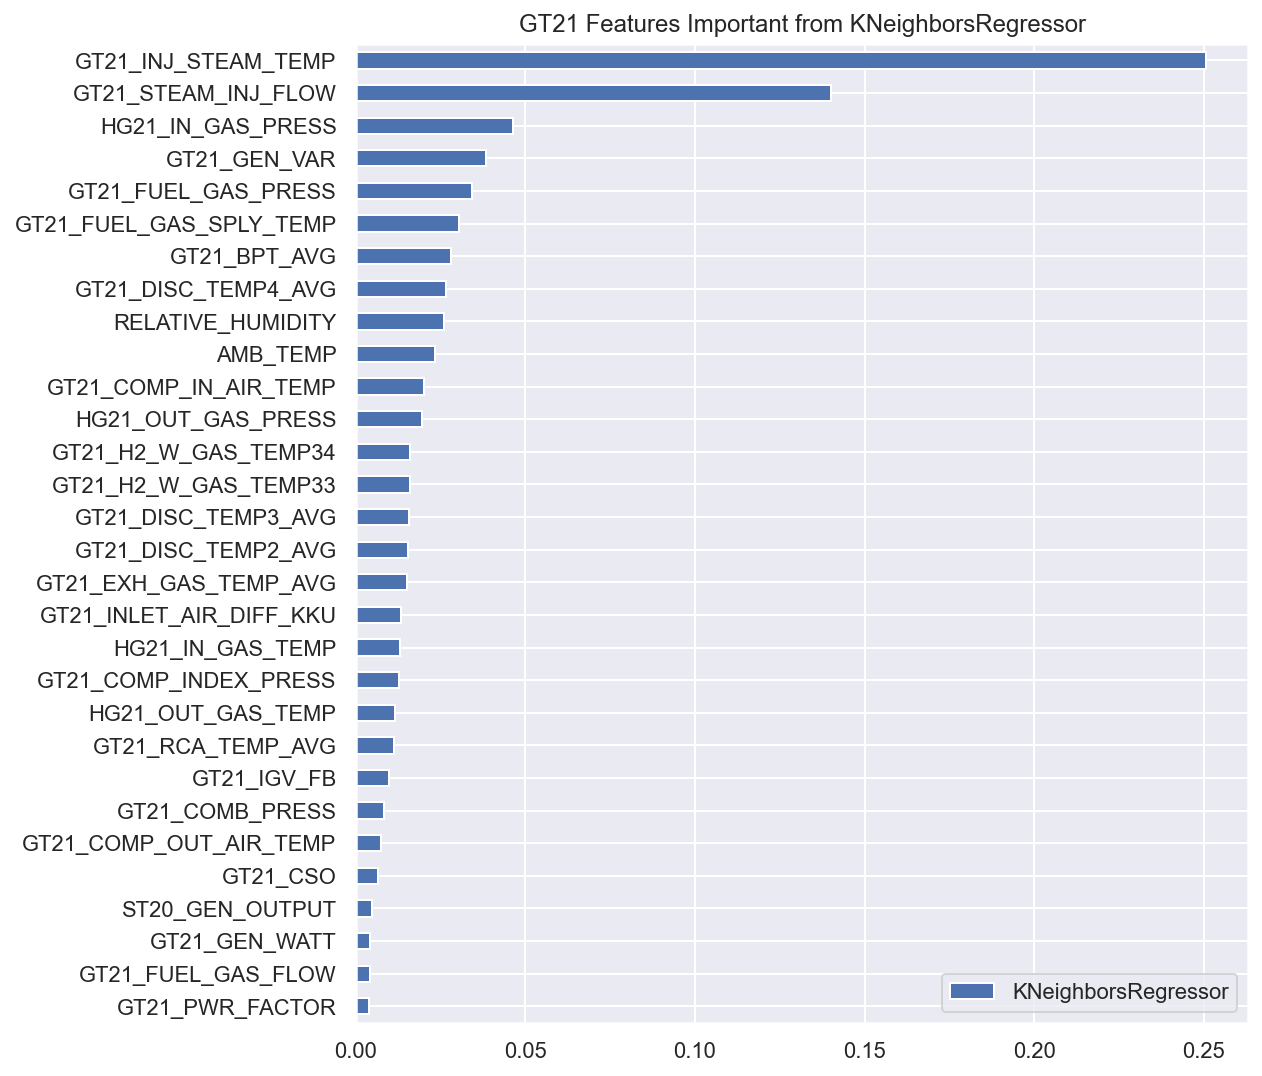

In [36]:
#Feature Importance
Result = showandconcat('KNeighborsRegressor',importance,Result)


## Neural Network (Regression)

### Modeling

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(len(Selected_Features)-1,)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
#     tf.keras.layers.Dense(units=512, activation='relu'),
#     tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=1)
#     tf.keras.layers.Dense(units=len(outputs), activation='softmax'),
])

# For Regression
model.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(), metrics=['mean_absolute_error'])

train_np = np.array(train).reshape(-1,len(Selected_Features)-1)
y_train_np = np.array(y_train)

#Modeling
model.fit(train_np,y_train_np,epochs=100,verbose=2)


Epoch 1/100
778/778 - 2s - loss: 0.5210 - mean_absolute_error: 0.5210 - 2s/epoch - 3ms/step
Epoch 2/100
778/778 - 1s - loss: 0.4931 - mean_absolute_error: 0.4931 - 1s/epoch - 2ms/step
Epoch 3/100
778/778 - 1s - loss: 0.4817 - mean_absolute_error: 0.4817 - 1s/epoch - 2ms/step
Epoch 4/100
778/778 - 1s - loss: 0.4705 - mean_absolute_error: 0.4705 - 1s/epoch - 2ms/step
Epoch 5/100
778/778 - 1s - loss: 0.4667 - mean_absolute_error: 0.4667 - 1s/epoch - 2ms/step
Epoch 6/100
778/778 - 1s - loss: 0.4623 - mean_absolute_error: 0.4623 - 1s/epoch - 2ms/step
Epoch 7/100
778/778 - 2s - loss: 0.4584 - mean_absolute_error: 0.4584 - 2s/epoch - 2ms/step
Epoch 8/100
778/778 - 1s - loss: 0.4553 - mean_absolute_error: 0.4553 - 1s/epoch - 2ms/step
Epoch 9/100
778/778 - 1s - loss: 0.4533 - mean_absolute_error: 0.4533 - 1s/epoch - 2ms/step
Epoch 10/100
778/778 - 1s - loss: 0.4511 - mean_absolute_error: 0.4511 - 1s/epoch - 2ms/step
Epoch 11/100
778/778 - 1s - loss: 0.4486 - mean_absolute_error: 0.4486 - 1s/epo

Epoch 90/100
778/778 - 1s - loss: 0.3506 - mean_absolute_error: 0.3506 - 1s/epoch - 2ms/step
Epoch 91/100
778/778 - 1s - loss: 0.3510 - mean_absolute_error: 0.3510 - 1s/epoch - 2ms/step
Epoch 92/100
778/778 - 1s - loss: 0.3482 - mean_absolute_error: 0.3482 - 1s/epoch - 2ms/step
Epoch 93/100
778/778 - 1s - loss: 0.3478 - mean_absolute_error: 0.3478 - 1s/epoch - 2ms/step
Epoch 94/100
778/778 - 1s - loss: 0.3477 - mean_absolute_error: 0.3477 - 1s/epoch - 2ms/step
Epoch 95/100
778/778 - 1s - loss: 0.3443 - mean_absolute_error: 0.3443 - 1s/epoch - 2ms/step
Epoch 96/100
778/778 - 1s - loss: 0.3465 - mean_absolute_error: 0.3465 - 1s/epoch - 2ms/step
Epoch 97/100
778/778 - 1s - loss: 0.3445 - mean_absolute_error: 0.3445 - 1s/epoch - 2ms/step
Epoch 98/100
778/778 - 1s - loss: 0.3432 - mean_absolute_error: 0.3432 - 1s/epoch - 2ms/step
Epoch 99/100
778/778 - 1s - loss: 0.3431 - mean_absolute_error: 0.3431 - 1s/epoch - 2ms/step
Epoch 100/100
778/778 - 2s - loss: 0.3410 - mean_absolute_error: 0.341

### Prediction

334/334 [==============================] - 1s 1ms/step
Testing MAE(ppm) = 1.2459
Testing MAPE(%) = 0.5195
Testing MSE = 2.9788


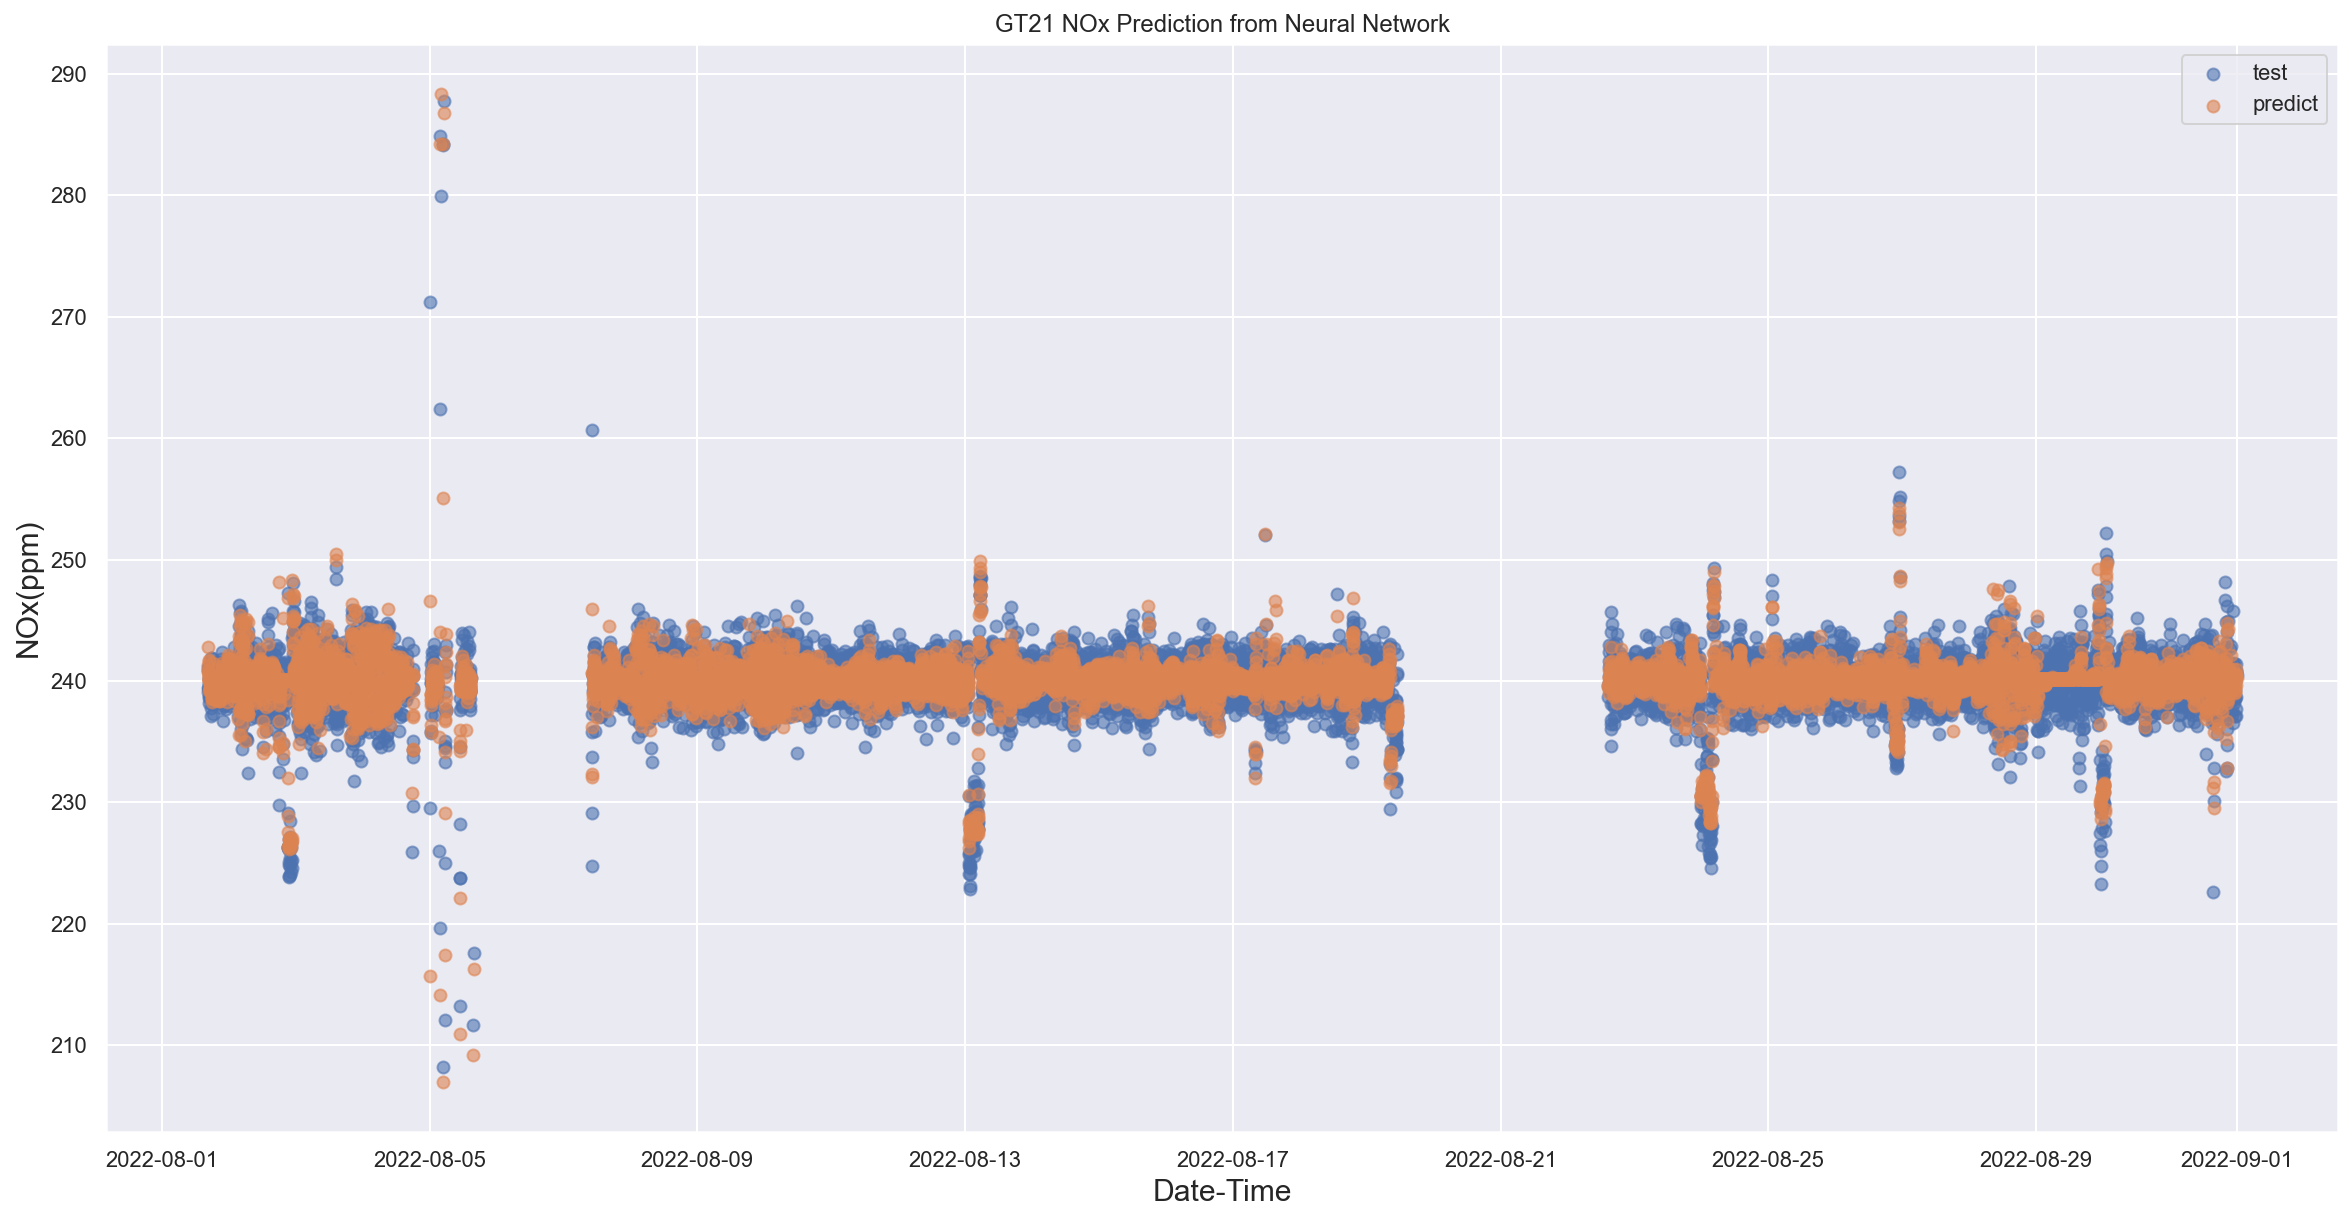

In [38]:
#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index)
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (for DEBUG ONLY)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_NN.xlsx')

#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('Neural Network','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('Neural Network','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('Neural Network','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('Neural Network',y_test_org,y_pred_org)


### Feature Importance

778/778 [==============================] - 1s 1ms/step


778/778 [==============================] - 1s 1ms/step


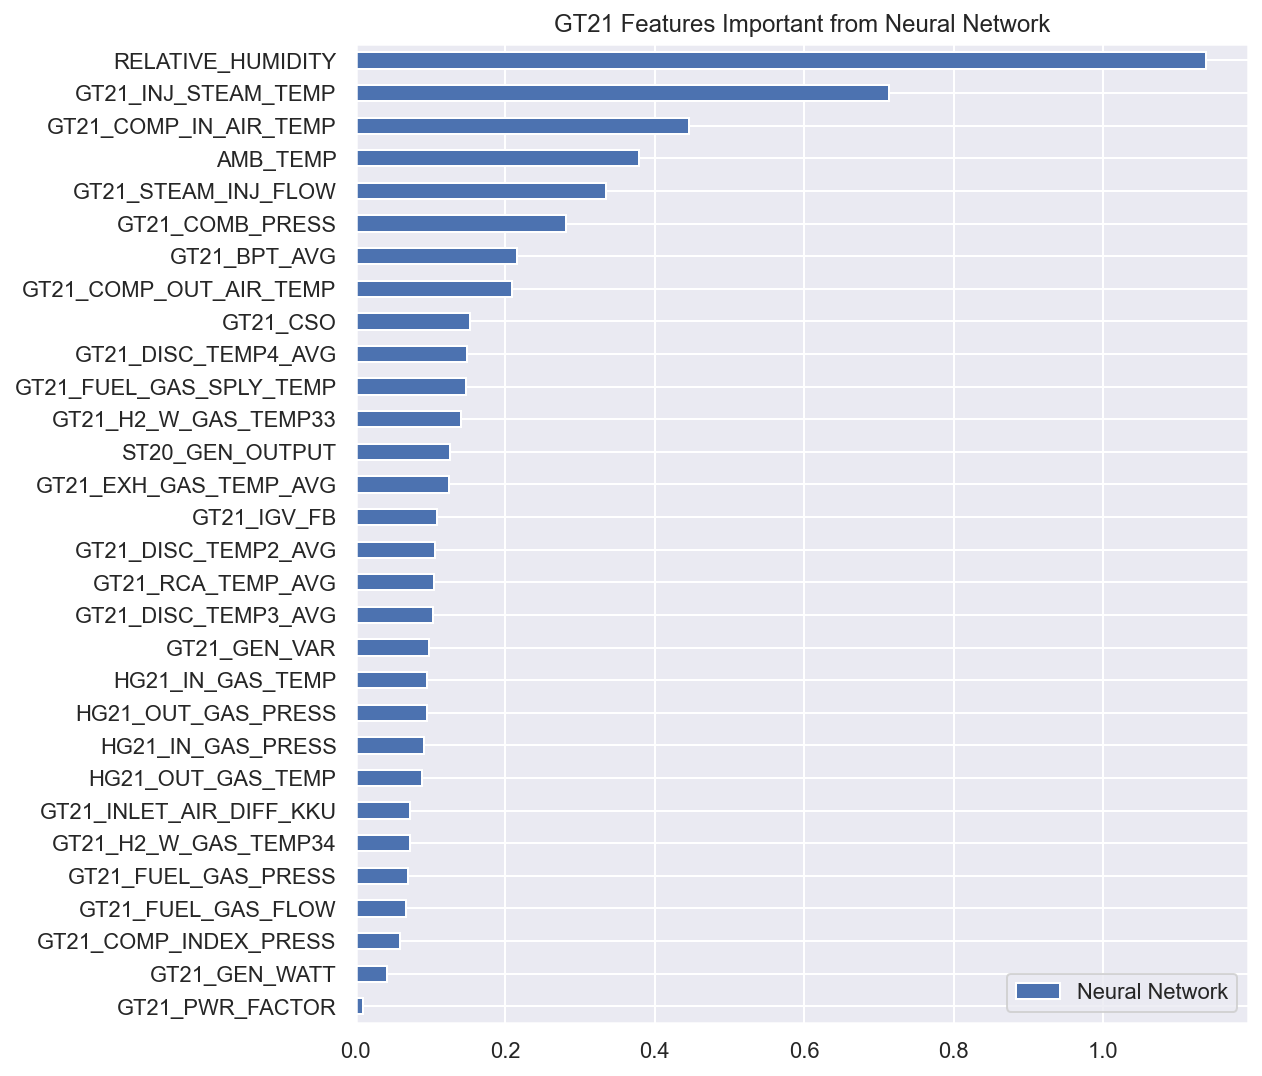

In [39]:
#Permutation Feature Importance
results = permutation_importance(model, train, y_train, scoring='neg_mean_absolute_error')
importance = results.importances_mean

#Feature Importance
Result = showandconcat('Neural Network',importance,Result)


# Show The Result

## Shown Accuracy

In [41]:
accuracy = pd.concat([accuracy_mae,accuracy_mape,accuracy_mse])
accuracy

Linear Regression  DecisionTreeRegressor  RandomForestRegressor  \
MAE(ppm)           1.447946               1.339937               1.203733   
MAPE(%)            0.604741               0.558476               0.501790   
MSE                5.012316               4.488824               3.002482   

          XGBRegressor  KNeighborsRegressor  Neural Network  
MAE(ppm)      1.206428             1.293738        1.245869  
MAPE(%)       0.502781             0.538903        0.519509  
MSE           2.980037             3.727299        2.978764

In [42]:
Result.sum()

Correlation              100.000000
Linear Regression        100.000000
DecisionTreeRegressor    100.000000
RandomForestRegressor    100.000000
XGBRegressor             100.000015
KNeighborsRegressor      100.000000
Neural Network           100.000000
dtype: float64

## Export Accuracy and Feature Importance

In [43]:
accuracy.to_excel('GT21_Aug22_Accuracy_Result.xlsx')
Result.to_excel('GT21_Aug22_Feature_Importance.xlsx')

## Feature Importance average from all Models

<AxesSubplot:>

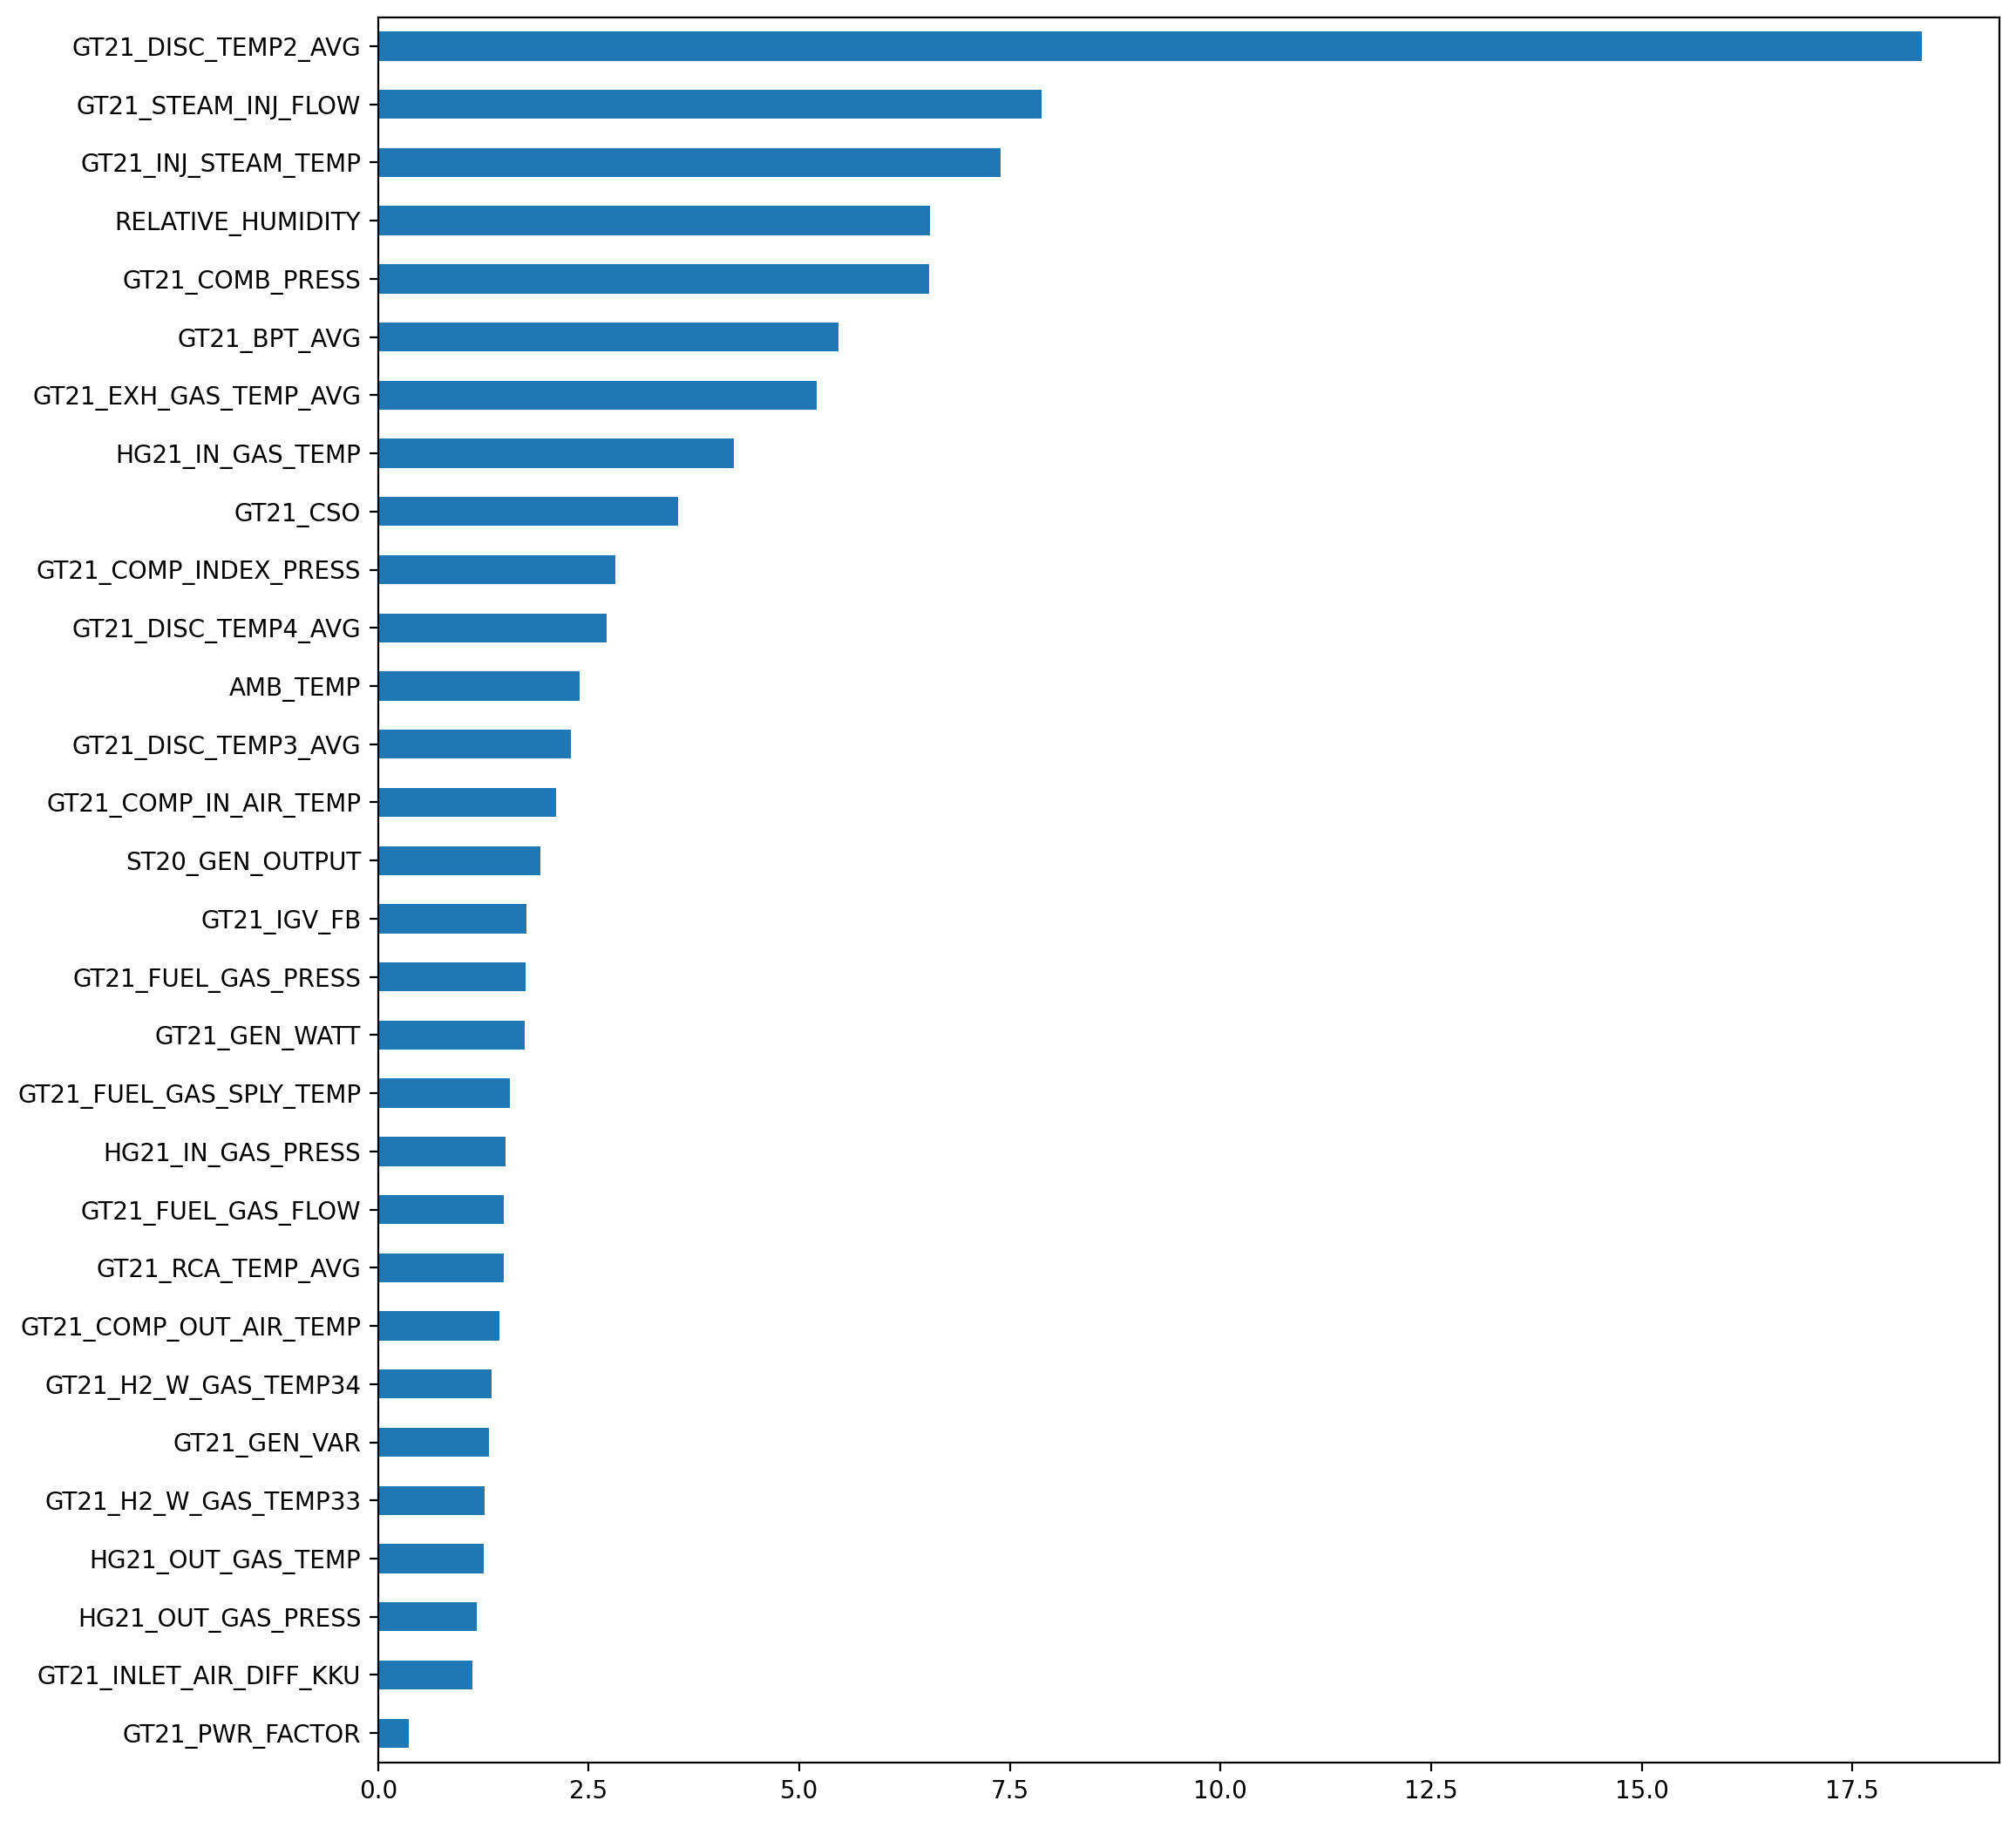

In [44]:
Result['Mean'] = Result.mean(axis=1)
Result['Sum'] = Result.sum(axis=1)-Result['Mean'] #Excluse Mean Column

plt.style.use('default')
Result['Mean'].sort_values().plot(kind='barh',figsize=(12,13))

In [51]:
#Result
Result.sort_values(by=['Mean'],ascending=False)

Correlation  Linear Regression  \
GT21_DISC_TEMP2_AVG         6.629385           2.767640   
GT21_STEAM_INJ_FLOW         3.793836           2.370067   
GT21_INJ_STEAM_TEMP         2.600696           1.575153   
RELATIVE_HUMIDITY           0.559564           0.296800   
GT21_COMB_PRESS             2.892704          16.091704   
GT21_BPT_AVG                7.794809          10.092271   
GT21_EXH_GAS_TEMP_AVG       8.255014          13.307522   
HG21_IN_GAS_TEMP            7.998028          12.939344   
GT21_CSO                    6.240185          12.084732   
GT21_COMP_INDEX_PRESS       1.352194           5.479800   
GT21_DISC_TEMP4_AVG         6.971687           1.991412   
AMB_TEMP                    0.241591           1.355890   
GT21_DISC_TEMP3_AVG         5.708289           0.980852   
GT21_COMP_IN_AIR_TEMP       0.266944           0.396277   
ST20_GEN_OUTPUT             7.082042           0.472596   
GT21_IGV_FB                 1.399468           5.562447   
GT21_FUEL_GAS_PRESS         3.649121           0.867177   
GT21_GEN_WATT               5.318536           3.598498   
GT21_FUEL_GAS_SPLY_TEMP     0.370971           1.653116   
HG21_IN_GAS_PRESS           0.659802           0.107831   
GT21_FUEL_GAS_FLOW          5.366738           1.335662   
GT21_RCA_TEMP_AVG           2.375683           1.408266   
GT21_COMP_OUT_AIR_TEMP      2.686095           0.777138   
GT21_H2_W_GAS_TEMP34        1.911060           0.571896   
GT21_GEN_VAR                1.310870           0.128708   
GT21_H2_W_GAS_TEMP33        1.786043           0.548747   
HG21_OUT_GAS_TEMP           2.267703           0.909864   
HG21_OUT_GAS_PRESS          1.086936           0.211258   
GT21_INLET_AIR_DIFF_KKU     1.286844           0.096728   
GT21_PWR_FACTOR             0.137162           0.020601   

                         DecisionTreeRegressor  RandomForestRegressor  \
GT21_DISC_TEMP2_AVG                  57.626225              20.694731   
GT21_STEAM_INJ_FLOW                   2.953844              13.989390   
GT21_INJ_STEAM_TEMP                   0.074983               4.562926   
RELATIVE_HUMIDITY                    11.332430               5.699135   
GT21_COMB_PRESS                      10.614690               4.953925   
GT21_BPT_AVG                          5.913142               4.472716   
GT21_EXH_GAS_TEMP_AVG                 2.805136               4.534446   
HG21_IN_GAS_TEMP                      1.296746               2.609856   
GT21_CSO                              0.000000               1.542542   
GT21_COMP_INDEX_PRESS                 4.129965               2.877575   
GT21_DISC_TEMP4_AVG                   0.000000               2.572320   
AMB_TEMP                              0.661404               2.147754   
GT21_DISC_TEMP3_AVG                   0.000000               4.117146   
GT21_COMP_IN_AIR_TEMP                 0.000000               1.399586   
ST20_GEN_OUTPUT                       0.000000               1.192777   
GT21_IGV_FB                           0.435030               1.458884   
GT21_FUEL_GAS_PRESS                   0.000000               1.832397   
GT21_GEN_WATT                         0.000000               1.481808   
GT21_FUEL_GAS_SPLY_TEMP               0.106494               1.524127   
HG21_IN_GAS_PRESS                     0.316396               1.831105   
GT21_FUEL_GAS_FLOW                    0.000000               1.447577   
GT21_RCA_TEMP_AVG                     0.000000               1.618121   
GT21_COMP_OUT_AIR_TEMP                0.000000               1.081517   
GT21_H2_W_GAS_TEMP34                  0.000000               1.565611   
GT21_GEN_VAR                          0.000000               1.152680   
GT21_H2_W_GAS_TEMP33                  0.000000               1.388231   
HG21_OUT_GAS_TEMP                     0.351495               1.764424   
HG21_OUT_GAS_PRESS                    0.387075               1.580229   
GT21_INLET_AIR_DIFF_KKU               0.994946               1.662382   
GT21_

## Feature Importance on Box Plot

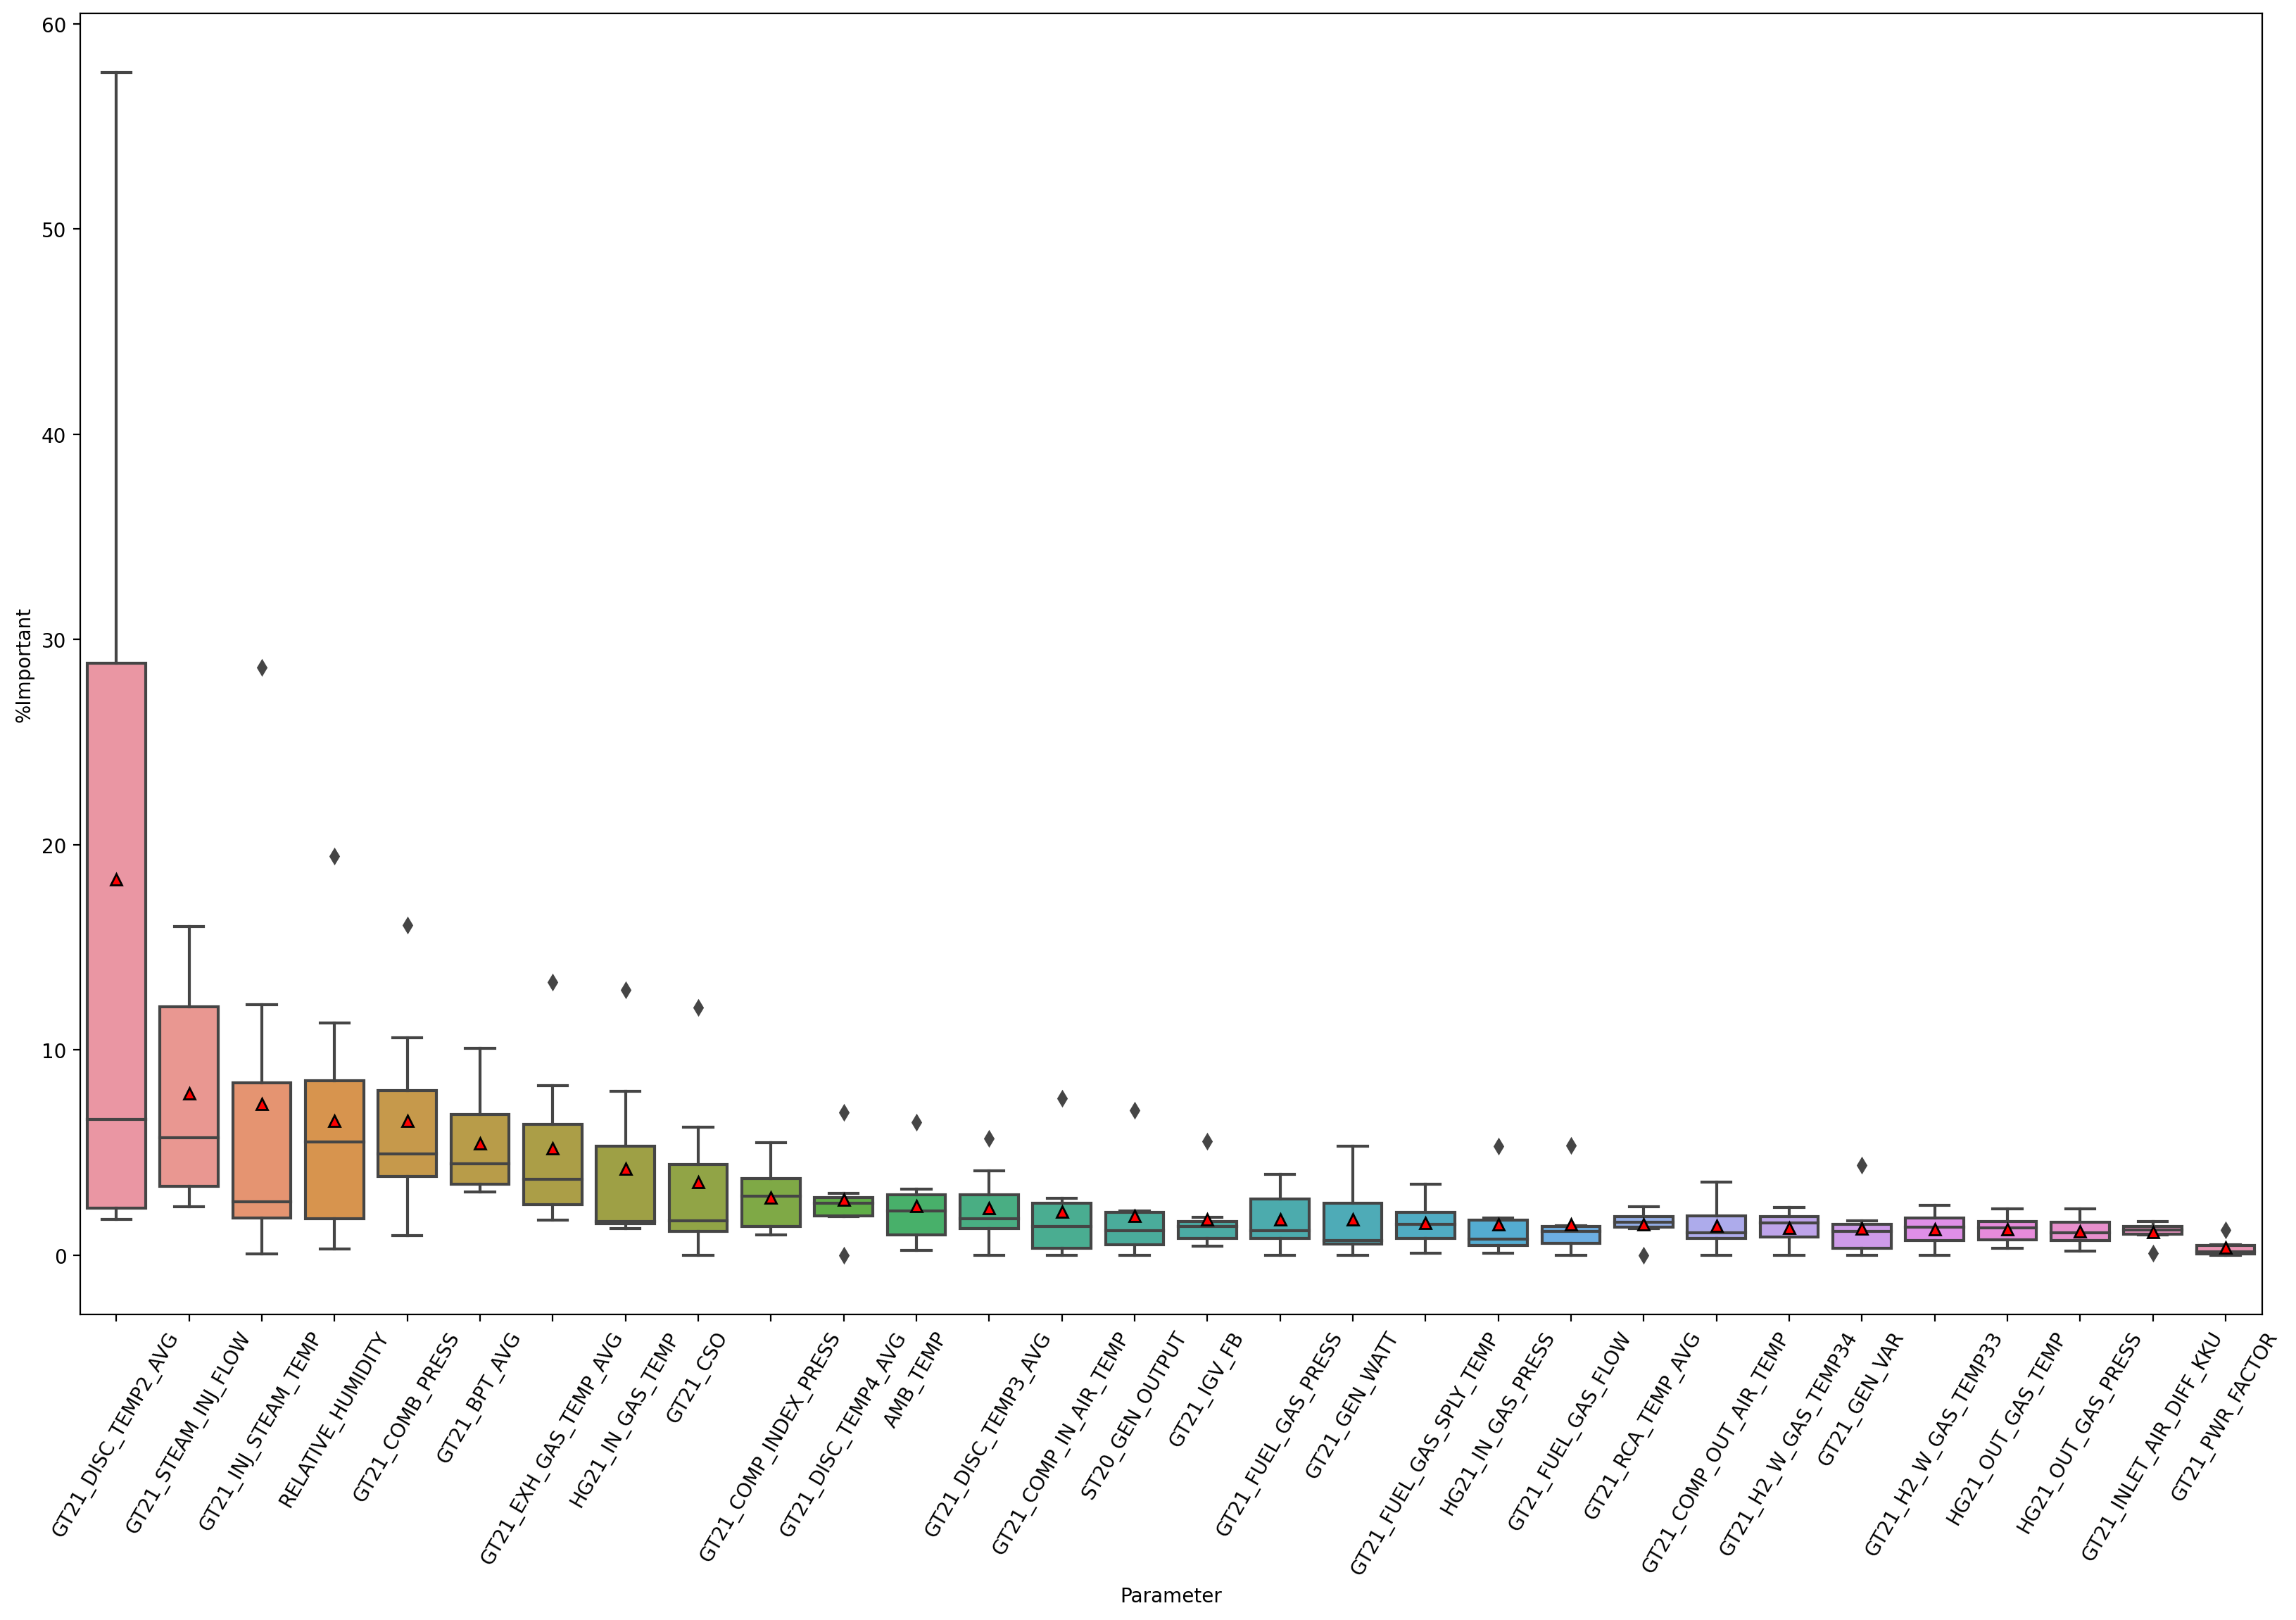

In [45]:
#plt.style.available

Result_T = Result.sort_values(by=['Mean'],ascending=False).drop(columns=['Sum','Mean']).transpose()
# Result_T.plot.hist(bins=60,figsize=(15,6),alpha=0.3)

#before normalization 
Result_T_melt = Result_T.melt(var_name='Parameter', value_name='%Important')
#.melt to transform to Long Format (like before pivot table)
plt.figure(figsize=(20, 12))
ax = sns.boxplot(x='Parameter', y='%Important', data=Result_T_melt,showmeans=True,meanprops={
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
ax.set_xticklabels(Result_T.keys(), rotation=60);

## Report All Features 

In [46]:
Des = Result.drop(columns=['Sum','Mean']).transpose().describe()
Des

GT21_GEN_WATT  GT21_GEN_VAR  GT21_PWR_FACTOR  GT21_FUEL_GAS_PRESS  \
count       7.000000      7.000000         7.000000             7.000000   
mean        1.740337      1.315847         0.362750             1.755879   
std         1.971299      1.493598         0.438194             1.493442   
min         0.000000      0.000000         0.000000             0.000000   
25%         0.535177      0.332739         0.078882             0.840239   
50%         0.713164      1.152680         0.158233             1.200274   
75%         2.540153      1.499645         0.489585             2.740759   
max         5.318536      4.393483         1.244082             3.928882   

        GT21_CSO  GT21_IGV_FB  GT21_COMP_IN_AIR_TEMP  GT21_BPT_AVG  \
count   7.000000     7.000000               7.000000      7.000000   
mean    3.557836     1.763957               2.110384      5.470669   
std     4.260676     1.751694               2.655029      2.638370   
min     0.000000     0.435030               0.000000      3.095593   
25%     1.150643     0.817844               0.331610      3.463076   
50%     1.671163     1.399468               1.399586      4.472716   
75%     4.423837     1.657534               2.537745      6.853975   
max    12.084732     5.562447               7.634391     10.092271   

       GT21_EXH_GAS_TEMP_AVG  GT21_FUEL_GAS_FLOW  GT21_FUEL_GAS_SPLY_TEMP  \
count               7.000000            7.000000                 7.000000   
mean                5.210167            1.497570                 1.567202   
std                 4.181308            1.781251                 1.170396   
min                 1.728176            0.000000                 0.106494   
25%                 2.473713            0.587910                 0.838535   
50%                 3.698587            1.157192                 1.524127   
75%                 6.394730            1.391619                 2.093507   
max                13.307522            5.366738                 3.475712   

       GT21_STEAM_INJ_FLOW  GT21_COMP_OUT_AIR_TEMP  GT21_COMB_PRESS  \
count             7.000000                7.000000         7.000000   
mean              7.873534                1.444919         6.537700   
std               5.556257                1.234979         5.148110   
min               2.370067                0.000000         0.957437   
25%               3.373840                0.811600         3.850825   
50%               5.729172                1.081517         4.953925   
75%              12.122089                1.921383         8.029591   
max              16.023637                3.566951        16.091704   

       GT21_H2_W_GAS_TEMP33  GT21_H2_W_GAS_TEMP34  GT21_INJ_STEAM_TEMP  \
count              7.000000              7.000000             7.000000   
mean               1.262900              1.349420             7.391307   
std                0.836255              0.814981            10.174688   
min                0.000000              0.000000             0.074983   
25%                0.712251              0.904665             1.826150   
50%                1.388231              1.565611             2.600696   
75%                1.803449              1.874290             8.387268   
max                2.420668              2.322417            28.636637   

       GT21_COMP_INDEX_PRESS  GT21_INLET_AIR_DIFF_KKU  HG21_IN_GAS_PRESS  \
count               7.000000                 7.000000           7.000000   
mean                2.813215                 1.122825           1.513071   
std                 1.651514                 0.512864           1.787356   
min                 1.005266                 0.096728           0.107831   
25%                 1.412382                 1.019600           0.488099   
50%                 2.877575                 1.237574           0.799682   
75%                 3.752550                 1.411946           1.698664   
max                 5.479800                 1.662382           5.310458   

     

In [47]:
# Export to Excel
Result[['Mean']].sort_values(['Mean'],ascending=False).to_excel('GT21_Feat_Result.xlsx')

In [48]:
#Visualize top 5 on Pairplot
#top5_features = ['GT21_DISC_TEMP2_AVG','GT21_STEAM_INJ_FLOW','GT21_INJ_STEAM_TEMP',
#                 'GT21_COMB_PRESS','RELATIVE_HUMIDITY','GT21_NOX_7O2']
#sns.pairplot(df[top5_features])